### VALIDAÇÃO DOS MODELOS TREINADOS ANTERIORMENTE COM BASES NÃO UTILIZADAS NO TREINAMENTO

#### GERAÇÃO DOS DADOS PARA VALIDAÇÃO

In [1]:
import pennylane as qml
from pennylane import numpy as np
import pandas as pd
import pickle
import os
import time
from tqdm import tqdm
import concurrent.futures

In [2]:
# definindo o simulador quântico
dev = qml.device("default.qubit", wires=2) 

In [3]:
# Lista para armazenar os ansatze
ansatz_list = []

# Gera 30 ansatz diferentes
for i in range(30):
    def ansatz(params, wires=[0, 1], ansatz_id=i):
        # Aplica um ansatz diferente dependendo do ID
        if ansatz_id == 0:
            qml.RX(params[0], wires=wires[0]),
            qml.RY(params[1], wires=wires[1]),
            qml.CNOT(wires=wires)
        elif ansatz_id == 1:
            qml.RY(params[0], wires=wires[0]),  # RY no qubit medido (cria superposição paramétrica)
            qml.RX(params[1], wires=wires[1]),  # RX no qubit auxiliar
            qml.CNOT(wires=[wires[1], wires[0]]),  # Entrelaçamento controlado pelo qubit 1
            qml.RZ(params[2], wires=wires[0])   # RZ para ajuste fino da fase
        elif ansatz_id == 2:
            qml.CRX(params[0], wires=wires),
            qml.RY(params[1], wires=wires[1]),
            qml.RX(params[2], wires=wires[0])
        elif ansatz_id == 3:
            qml.RY(params[0], wires=wires[0]),
            qml.CRZ(params[1], wires=wires),
            qml.Hadamard(wires=wires[1])
        elif ansatz_id == 4:
            qml.RX(params[0], wires=wires[0]),
            qml.RY(params[1], wires=wires[1]),
            qml.CNOT(wires=wires),
            qml.RZ(params[2], wires=wires[0])
        elif ansatz_id == 5:
            qml.RY(params[0], wires=wires[0]),  # RY em q0 (garante superposição)
            qml.RX(params[1], wires=wires[1]),  # RX em q1
            qml.CNOT(wires=[wires[1], wires[0]]),  # Entrelaça q1 → q0 (controlado por q1)
            qml.RZ(params[2], wires=wires[0])   # Fase em q0 (afeta a medição)
        elif ansatz_id == 6:
            qml.CRY(params[0], wires=wires),
            qml.RZ(params[1], wires=wires[0]),  
            qml.RY(params[2], wires=wires[1])  # Substitui o X fixo
        elif ansatz_id == 7:
            qml.RY(params[0], wires=wires[0]),  # Mudei RZ para RY
            qml.CRX(params[1], wires=wires),
            qml.RX(params[2], wires=wires[1])  # Troquei Hadamard por RX parametrizado
        elif ansatz_id == 8:
            qml.RY(params[0], wires=wires[0]),
            qml.CZ(wires=wires),
            qml.RX(params[1], wires=wires[1]),
            qml.RZ(params[2], wires=wires[0])
        elif ansatz_id == 9:
            qml.CRZ(params[0], wires=wires),
            qml.CNOT(wires=[wires[1], wires[0]]),
            qml.RY(params[1], wires=wires[1])
        elif ansatz_id == 10:
            qml.Hadamard(wires=wires[0]),
            qml.CRX(params[0], wires=wires),
            qml.RY(params[1], wires=wires[1]),
            qml.RZ(params[2], wires=wires[0])
        elif ansatz_id == 11:
            qml.X(wires=wires[0]),
            qml.CRY(params[0], wires=wires),
            qml.Z(wires=wires[1]),
            qml.RX(params[1], wires=wires[0])
        elif ansatz_id == 12:
            qml.RZ(params[0], wires=wires[0]),
            qml.CNOT(wires=wires),
            qml.RX(params[1], wires=wires[1]),
            qml.RY(params[2], wires=wires[0])
        elif ansatz_id == 13:
            qml.Hadamard(wires=wires[0]),
            qml.CZ(wires=wires),
            qml.RY(params[0], wires=wires[1]),
            qml.RZ(params[1], wires=wires[0])
        elif ansatz_id == 14:
            qml.CRX(params[0], wires=wires),
            qml.CNOT(wires=wires),
            qml.RZ(params[1], wires=wires[0]),
            qml.RX(params[2], wires=wires[1])
        elif ansatz_id == 15:
            qml.Y(wires=wires[0]),
            qml.CRZ(params[0], wires=wires),
            qml.Hadamard(wires=wires[1]),
            qml.RY(params[1], wires=wires[0])
        elif ansatz_id == 16:
            qml.RY(params[0], wires=wires[0]),
            qml.CRX(params[1], wires=wires),
            qml.CNOT(wires=wires),
            qml.RZ(params[2], wires=wires[1])
        elif ansatz_id == 17:
            qml.Hadamard(wires=wires[0]),
            qml.CRY(params[0], wires=wires),
            qml.RZ(params[1], wires=wires[1]),
            qml.RX(params[2], wires=wires[0])
        elif ansatz_id == 18:
            qml.X(wires=wires[1]),
            qml.CZ(wires=wires),
            qml.RY(params[0], wires=wires[0]),
            qml.RZ(params[1], wires=wires[1])
        elif ansatz_id == 19:
            qml.RZ(params[0], wires=wires[0]),
            qml.CRY(params[1], wires=wires),
            qml.Hadamard(wires=wires[1]),
            qml.RX(params[2], wires=wires[0])
        elif ansatz_id == 20:
            qml.CNOT(wires=wires),
            qml.CRZ(params[0], wires=wires),
            qml.RX(params[1], wires=wires[0]),
            qml.RY(params[2], wires=wires[1])
        elif ansatz_id == 21:
            qml.Hadamard(wires=wires[0]),
            qml.CRX(params[0], wires=wires),
            qml.CZ(wires=wires),
            qml.RZ(params[1], wires=wires[1])
        elif ansatz_id == 22:
            qml.RY(params[0], wires=wires[0]),
            qml.CNOT(wires=wires),
            qml.CRZ(params[1], wires=wires),
            qml.RX(params[2], wires=wires[1])
        elif ansatz_id == 23:
            qml.Z(wires=wires[0]),
            qml.CRY(params[0], wires=wires),
            qml.RX(params[1], wires=wires[1]),
            qml.RZ(params[2], wires=wires[0])
        elif ansatz_id == 24:
            qml.Hadamard(wires=wires[0]),
            qml.CRZ(params[0], wires=wires),
            qml.RY(params[1], wires=wires[1]),
            qml.RX(params[2], wires=wires[0])
        elif ansatz_id == 25:
            qml.RX(params[0], wires=wires[1]),  # Substitui o X fixo
            qml.CNOT(wires=wires),
            qml.CRX(params[1], wires=wires),
            qml.RZ(params[2], wires=wires[0])
        elif ansatz_id == 26:
            qml.RZ(params[0], wires=wires[0]),
            qml.CZ(wires=wires),
            qml.Hadamard(wires=wires[1]),
            qml.RY(params[1], wires=wires[0])
        elif ansatz_id == 27:
            qml.RY(params[0], wires=wires[0]),
            qml.CRX(params[1], wires=wires),
            qml.Z(wires=wires[1]),
            qml.RX(params[2], wires=wires[0])
        elif ansatz_id == 28:
            qml.Hadamard(wires=wires[0]),
            qml.CNOT(wires=wires),
            qml.CRY(params[0], wires=wires),
            qml.RZ(params[1], wires=wires[1])
        elif ansatz_id == 29:
            qml.RX(params[0], wires=wires[0]),
            qml.CRZ(params[1], wires=wires),
            qml.CNOT(wires=wires),
            qml.RY(params[2], wires=wires[1])

    ansatz_list.append(ansatz)

In [4]:
@qml.qnode(dev)
def generic_circuit(params, ansatz_id, x, amplitde_embedding=True):

    """Circuit genérico que aplica um ansatz específico."""
    if amplitde_embedding:
        qml.AmplitudeEmbedding(x, wires=[0, 1], normalize=True, pad_with=0.0)
    else:
        qml.AngleEmbedding(x, wires=[0, 1], rotation="X")

    ansatz = ansatz_list[ansatz_id]
    ansatz(params)
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))

In [5]:
# função para fazer a previsão
def predict(params, x, ansatz_id, bias, amplitde_embedding=True):
    """Faz previsões com o circuito genérico."""
    predictions = np.array([generic_circuit(params=params, ansatz_id=ansatz_id, amplitde_embedding=amplitde_embedding, x=x) ])
    predictions = np.mean(predictions)
    return predictions + bias

#função de custo MSE padrão
def MSE(params, X, y, ansatz_id, bias, amplitde_embedding=True):
    """Função de custo para otimização."""
    predictions = np.array([predict(params=params, x=x, ansatz_id=ansatz_id, bias=bias, amplitde_embedding=amplitde_embedding) for x in X])
    return np.mean((predictions - y) ** 2)  # MSE

#função de custo BCE
def BCE(params, X, y, ansatz_id, bias, amplitde_embedding=True):
    """Função de custo para otimização."""
    predictions = np.array([predict(params=params, x=x, ansatz_id=ansatz_id, bias=bias, amplitde_embedding=amplitde_embedding) for x in X])
    predictions = np.clip(predictions, 1e-15, 1 - 1e-15)  # Previne log(0)

    return -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))  # BCE

# função para calcular a acurácia
def accuracy(params, X, y, ansatz_id, bias, amplitde_embedding=True):
    """Calcula a acurácia do modelo."""
    predictions = np.array([predict(params=params, x=x, ansatz_id=ansatz_id, bias=bias, amplitde_embedding=amplitde_embedding) for x in X])
    predictions = np.sign(predictions)  # Converte para -1 ou 1
    return np.mean(predictions == y)  # Acurácia

In [6]:
# lendo os datasets
df1 = pd.read_csv('./../datasets/moons_datasets/moons_50samples_high_noise.csv')
df1.nome = 'moons_50samples_high_noise'
df2 = pd.read_csv('./../datasets/moons_datasets/moons_50samples_low_noise.csv')
df2.nome = 'moons_50samples_low_noise'
df3 = pd.read_csv('./../datasets/moons_datasets/moons_50samples_no_noise.csv')
df3.nome = 'moons_50samples_no_noise'
df4 = pd.read_csv('./../datasets/moons_datasets/moons_500samples_high_noise.csv')
df4.nome = 'moons_500samples_high_noise'
df5 = pd.read_csv('./../datasets/moons_datasets/moons_500samples_low_noise.csv')
df5.nome = 'moons_500samples_low_noise'
df6 = pd.read_csv('./../datasets/moons_datasets/moons_500samples_no_noise.csv')
df6.nome = 'moons_500samples_no_noise'

In [7]:
# carregando os samples dos dataframes

with open("./../datasets/moons_metrics/moons_50samples_high_noise.pkl", 'rb') as file:
    metrics1 = pickle.load(file)

with open("./../datasets/moons_metrics/moons_50samples_low_noise.pkl", 'rb') as file:
    metrics2 = pickle.load(file)

with open("./../datasets/moons_metrics/moons_50samples_no_noise.pkl", 'rb') as file:
    metrics3 = pickle.load(file)

with open("./../datasets/moons_metrics/moons_500samples_high_noise.pkl", 'rb') as file:
    metrics4 = pickle.load(file)

with open("./../datasets/moons_metrics/moons_500samples_low_noise.pkl", 'rb') as file:
    metrics5 = pickle.load(file)

with open("./../datasets/moons_metrics/moons_500samples_no_noise.pkl", 'rb') as file:
    metrics6 = pickle.load(file)


In [8]:
#settando variáveis para geração de dados

samples = [
    metrics1, metrics2, metrics3,
    metrics4, metrics5, metrics6
]

data_frames = [
    df1, df2, df3, df4, df5, df6
]

cost_functions = [MSE]

optimizers = [qml.AdamOptimizer(stepsize=0.1)]

ansatz_ids = list(range(30))

samples_ids = list(range(30))

In [9]:
def salvar_dataframe(df_novo, arquivo):
    if os.path.exists(arquivo):
        df_existente = pd.read_csv(arquivo)
        df_final = pd.concat([df_existente, df_novo], ignore_index=True)
    else:
        df_final = df_novo
    
    df_final.to_csv(arquivo, index=False)

In [10]:
def train_wrapper(args):
    """Função que encapsula toda a lógica de treinamento para paralelização"""
    (ansatz_id, sample, df, sample_id, cost_function, opt_class, 
     amplitde_embedding, rng_weights, nome,save_path) = args
    
    # Reset do otimizador
    if opt_class.__class__.__name__ == "GradientDescentOptimizer":
        opt = qml.GradientDescentOptimizer(stepsize=0.1)
    elif opt_class.__class__.__name__ == "AdamOptimizer":
        opt = qml.AdamOptimizer(stepsize=0.1)
    else:
        opt = opt_class(stepsize=0.1)
    
    # Configuração dos parâmetros
    num_params = 3 if ansatz_id not in [0, 3, 9, 11, 13, 15, 18, 21, 26, 28] else 2
    params = np.array(2 * rng_weights.random(num_params) * np.pi, requires_grad=True)
    bias = np.array(0.0, requires_grad=True)

    # Preparação dos dados
    X_train = df.loc[sample["samples"][sample_id], df.columns != "target"].to_numpy()
    y_train = 2*df.loc[sample["samples"][sample_id], "target"].values.flatten() - 1
    
    X_test = df.loc[~df.index.isin(sample["samples"][sample_id]), df.columns != "target"].to_numpy()
    y_test = 2*df.loc[~df.index.isin(sample["samples"][sample_id]), "target"].values.flatten() - 1

    # Treinamento
    epoch = 20
    for i in range(epoch):
        params,_,_,_,bias = opt.step(cost_function, params, X_train, y_train, ansatz_id, bias, 
                               amplitde_embedding=amplitde_embedding)
    
    # Avaliação
    accuracy_train = accuracy(params, X_train, y_train, ansatz_id, bias, 
                             amplitde_embedding=amplitde_embedding)
    accuracy_test = accuracy(params, X_test, y_test, ansatz_id, bias, 
                            amplitde_embedding=amplitde_embedding)

    # Retorna resultados para coleta
    return {
        "TIPO_DE_CARREGAMENTO_ENTRADA": amplitde_embedding,
        "ARQUITETURA_ANSATZ": ansatz_id,
        "OTIMIZADOR": opt.__class__.__name__,
        "BASE_DE_DADOS": nome,
        "SAMPLE": sample_id,
        "METRICA_NAO_SUPERVISIONADA": cost_function.__name__,
        "INDICE_DIVISAO_BASE_DE_DADOS": 0.7,
        "ACURACIA_TREINAMENTO": accuracy_train,
        "ACURACIA_TESTE": accuracy_test
    }

In [11]:
# Configuração de paralelização
def parallel_training(ansatz_ids, samples, data_frames, samples_ids, 
                     cost_functions, optimizers, save_path, max_workers=None):
    
    rng_weights = np.random.default_rng(42)
    tasks = []
    
    # Gerar todas as combinações de parâmetros
    for ansatz_id in ansatz_ids:
        for sample, df in zip(samples, data_frames):
            for sample_id in samples_ids:
                for cost_function in cost_functions:
                    for opt_class in optimizers:
                        for amplitde_embedding in [True]:
                            tasks.append((
                                ansatz_id, sample, df, sample_id, 
                                cost_function, opt_class, amplitde_embedding, 
                                rng_weights, df.nome, save_path
                            ))

    # Execução paralela
    with concurrent.futures.ProcessPoolExecutor(max_workers=max_workers) as executor:
        results = list(tqdm(executor.map(train_wrapper, tasks), 
                      total=len(tasks), 
                      desc="Executando Experimentos"))
    
    # Salvar resultados
    final_df = pd.DataFrame(results)
    salvar_dataframe(final_df, save_path)

In [ ]:
# Uso
parallel_training(

    ansatz_ids = list(range(30)),

    samples = [
    metrics1, metrics2, metrics3,
    metrics4, metrics5, metrics6
    ],

    data_frames = [
        df1, df2, df3, df4, df5, df6
    ],

    samples_ids = list(range(30)),

    cost_functions = [MSE],

    optimizers = [qml.AdamOptimizer(stepsize=0.1)],

    save_path = "./resultados_val.csv",

    max_workers = 12  
)

Executando Experimentos:   0%|          | 2/5400 [00:14<11:12:19,  7.47s/it]Exception ignored in: Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7df2f5398d70>>
<bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7df2f5398d70>>
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
  File "/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(    
def _clean_thread_parent_frames(KeyboardInterrupt
: KeyboardInterrupt
: 



#### TRANSFORMAÇÃO DOS DADOS GERADOS

In [1]:
import pandas as pd
import pickle
import numpy as np
import ast

In [2]:
#abrindo o resutlado gerado pelo treinamento dos circuitos
df = pd.read_csv('./resultados_val.csv')

In [3]:
# carregando os samples dos dataframes

with open("./../datasets/moons_metrics/moons_50samples_high_noise.pkl", 'rb') as file:
    metrics1 = pickle.load(file)

with open("./../datasets/moons_metrics/moons_50samples_low_noise.pkl", 'rb') as file:
    metrics2 = pickle.load(file)

with open("./../datasets/moons_metrics/moons_50samples_no_noise.pkl", 'rb') as file:
    metrics3 = pickle.load(file)

with open("./../datasets/moons_metrics/moons_500samples_high_noise.pkl", 'rb') as file:
    metrics4 = pickle.load(file)

with open("./../datasets/moons_metrics/moons_500samples_low_noise.pkl", 'rb') as file:
    metrics5 = pickle.load(file)

with open("./../datasets/moons_metrics/moons_500samples_no_noise.pkl", 'rb') as file:
    metrics6 = pickle.load(file)


In [4]:
df.head()

,TIPO_DE_CARREGAMENTO_ENTRADA,ARQUITETURA_ANSATZ,OTIMIZADOR,BASE_DE_DADOS,SAMPLE,METRICA_NAO_SUPERVISIONADA,INDICE_DIVISAO_BASE_DE_DADOS,ACURACIA_TREINAMENTO,ACURACIA_TESTE
0,True,0,AdamOptimizer,moons_50samples_high_noise,0,MSE,0.7,0.642857,0.533333
1,True,0,AdamOptimizer,moons_50samples_high_noise,1,MSE,0.7,0.628571,0.566667
2,True,0,AdamOptimizer,moons_50samples_high_noise,2,MSE,0.7,0.600000,0.700000
3,True,0,AdamOptimizer,moons_50samples_high_noise,3,MSE,0.7,0.628571,0.533333
4,True,0,AdamOptimizer,moons_50samples_high_noise,4,MSE,0.7,0.614286,0.600000


In [5]:
def transformar_dataframe(df, metrics, file_path, target="ACURACIA_TESTE"):

    """
    Os dados para treinar os modelos serão apenas as métricas de complexidade do conjunto de dados usado no treinamento.
    Essa função tem o objetivo justamente de pegar o resultado gerado pelo arquivo ansatz, para os 30 circuitos, e para os 30 samples em cada dataset usado
    A partir de uma combinação do nome do arquivo e da sample, pegar o resultado de cada métrica antes armazenada em um arquivo .pkl
    Salvar essas métricas em um novo dataframe, junto com o target, que será um array contendo a acurácia dos 30 ansatz
    df é o arquivo que contém os resultados gerados
    metrics é uma lista de dicionários com os resultados do arquivo pkl
    target é uma string apontando qual vai ser o valor que os modelos irão prever, ex: ACURACIA_TREINAMENTO, ACURACIA_TESTE.
    """

    new_df = {
        'f1': [],
        'f1v': [], 
        'f2': [], 
        'f3': [], 
        'f4': [], 
        'l1': [], 
        'l2': [], 
        'l3': [], 
        'n1': [], 
        'n2': [], 
        'n3': [], 
        'n4': [], 
        't1': [], 
        'lsc': [], 
        'density': [], 
        'clsCoef': [], 
        'hubs': [], 
        't2': [], 
        't3': [], 
        't4': [], 
        'c1': [], 
        'c2': [],
        'target': []
    }


    for metric in metrics:

        #filtrar pelo nome do arquivo
        df_arq = df[df["BASE_DE_DADOS"]==metric["arquivo"]]

        for sample_id in range(30):

            #filtrar pelo número da sample
            df_arq_sample = df_arq[df_arq["SAMPLE"]==sample_id]

            #preencher o novo dataframe
            for key in new_df.keys():

                if key != 'target':
                    new_df[key].append(metric[key][sample_id])

                else:

                    new_df[key].append(df_arq_sample[target].to_numpy().tolist())

    #salvar em um csv
    results = pd.DataFrame(new_df)

    results.to_csv(file_path, index=False)



In [6]:
metrics = [
    metrics1, metrics2, metrics3, metrics4,
    metrics5, metrics6
]

In [7]:
transformar_dataframe(df=df, metrics=metrics, file_path="./data_val.csv",target="ACURACIA_TREINAMENTO")

In [8]:
df_check = pd.read_csv("./data_val.csv")

In [9]:
df_check.head()

,f1,f1v,f2,f3,f4,l1,l2,l3,n1,n2,...,lsc,density,clsCoef,hubs,t2,t3,t4,c1,c2,target
0,0.478202,0.208000,0.239249,0.657143,0.414286,0.170480,0.171429,0.100000,0.114286,0.403476,...,0.932449,0.915114,0.431955,0.825841,0.028571,0.028571,1.0,0.0,0.0,"[0.6428571428571429, 0.5, 0.6142857142857143, ..."
1,0.451125,0.207370,0.350864,0.642857,0.385714,0.188914,0.200000,0.100000,0.114286,0.398657,...,0.926735,0.901449,0.457009,0.787843,0.028571,0.028571,1.0,0.0,0.0,"[0.6285714285714286, 0.5, 0.6285714285714286, ..."
2,0.568191,0.277987,0.393224,0.714286,0.528571,0.212132,0.242857,0.142857,0.142857,0.432263,...,0.940612,0.916356,0.443462,0.800716,0.028571,0.028571,1.0,0.0,0.0,"[0.6, 0.5, 0.5857142857142857, 0.5, 0.6, 0.5, ..."
3,0.546380,0.268650,0.380538,0.714286,0.485714,0.208955,0.228571,0.128571,0.150000,0.422010,...,0.943061,0.918841,0.479966,0.791493,0.028571,0.028571,1.0,0.0,0.0,"[0.6285714285714286, 0.5, 0.6142857142857143, ..."
4,0.551418,0.264258,0.329124,0.685714,0.485714,0.198964,0.214286,0.171429,0.157143,0.425360,...,0.943265,0.920911,0.471609,0.818027,0.028571,0.028571,1.0,0.0,0.0,"[0.6142857142857143, 0.5, 0.6285714285714286, ..."


#### PREDIÇÃO DOS MODELOS TREINADOS PARA OS DADOS GERADOS

In [1]:
from joblib import load
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import ast
import numpy as np

In [2]:
#modelo MLP, 1 camada intermediára com 500 neurônios
class MLP_500_regressor(nn.Module):
    def __init__(self, input_len):
        super().__init__()

        self.layer1 = nn.Linear(input_len, 500)  
        self.relu = nn.ReLU()                          
        self.layer2 = nn.Linear(500, 30) 

    def forward(self, x):

        x = self.relu(self.layer1(x))  
        logits = self.layer2(x)
        
        return logits

#modelo MLP, 1 camada intermediára com 500 neurônios
class MLP_500_classifier(nn.Module):
    def __init__(self, input_len):
        super().__init__()

        self.layer1 = nn.Linear(input_len, 500)  
        self.relu = nn.ReLU()                          
        self.layer2 = nn.Linear(500, 30) 

    def forward(self, x):

        x = self.relu(self.layer1(x))  
        logits = self.layer2(x)
        
        return logits
    
class MLP_100_100_100_classifier(nn.Module):
    def __init__(self, input_len):
        super().__init__()

        self.layer1 = nn.Linear(input_len, 100)  
        self.relu = nn.ReLU()                          
        self.hidden_layer_relu = nn.Sequential(
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Linear(100,100),
            nn.ReLU()
        )
        self.layer2 = nn.Linear(100, 30)

    def forward(self, x):

        x = self.relu(self.layer1(x))
        x = self.hidden_layer_relu(x)
        logits = self.layer2(x)
        
        return logits
    
class MLP_100_100_100_regressor(nn.Module):
    def __init__(self, input_len):
        super().__init__()

        self.layer1 = nn.Linear(input_len, 100)  
        self.relu = nn.ReLU()
        self.hidden_layer_relu = nn.Sequential(
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Linear(100,100),
            nn.ReLU()
        )                          
        self.layer2 = nn.Linear(100, 30) 

    def forward(self, x):

        x = self.relu(self.layer1(x))
        x = self.hidden_layer_relu(x)
        logits = self.layer2(x)
        
        return logits
    
class MLP_500_500_500_classifier(nn.Module):
    def __init__(self, input_len):
        super().__init__()

        self.layer1 = nn.Linear(input_len, 500)  
        self.relu = nn.ReLU()                          
        self.hidden_layer_relu = nn.Sequential(
            nn.Linear(500,500),
            nn.ReLU(),
            nn.Linear(500,500),
            nn.ReLU(),
            nn.Linear(500,500),
            nn.ReLU()
        )
        self.layer2 = nn.Linear(500, 30)

    def forward(self, x):

        x = self.relu(self.layer1(x))
        x = self.hidden_layer_relu(x)
        logits = self.layer2(x)
        
        return logits
    
class MLP_500_500_500_regressor(nn.Module):
    def __init__(self, input_len):
        super().__init__()

        self.layer1 = nn.Linear(input_len, 500)  
        self.relu = nn.ReLU()
        self.hidden_layer_relu = nn.Sequential(
            nn.Linear(500,500),
            nn.ReLU(),
            nn.Linear(500,500),
            nn.ReLU(),
            nn.Linear(500,500),
            nn.ReLU()
        )                          
        self.layer2 = nn.Linear(500, 30) 

    def forward(self, x):

        x = self.relu(self.layer1(x))
        x = self.hidden_layer_relu(x)
        logits = self.layer2(x)
        
        return logits

In [ ]:
# abrindo os dados de validação
df = pd.read_csv("./data_val.csv")
X = df.drop(columns=["target"]).to_numpy()
y = pd.DataFrame(df['target'].apply(ast.literal_eval).tolist()).to_numpy()

# Para cada amostra, identificar o ansatz com maior acurácia
y_best_ansatz = np.argmax(y, axis=1)  # Retorna índices 0-29

In [4]:
# modelos salvos anteriormente
Ada_Boost_clf = load('./../models/models_salvos/Ada_Boost_classifier.joblib')
Ada_Boost_rgs = load('./../models/models_salvos/Ada_Boost_regressor.joblib')
dt_clf = load('./../models/models_salvos/dt_classifier.joblib')
dt_rgs = load('./../models/models_salvos/dt_regressor.joblib')
gb = load('./../models/models_salvos/gb_clf.joblib')
svm_rbf_clf = load('./../models/models_salvos/svm_rbf_c.joblib')
svm_rbf_rgs = load('./../models/models_salvos/svm_rbf_epsilon.joblib')
svm_sigmoid_clf = load('./../models/models_salvos/svm_sigmoid_c.joblib')
svm_sigmoid_rgs = load('./../models/models_salvos/svm_sigmoid_epsilon.joblib')
svm_linear_clf = load('./../models/models_salvos/svm_linear_c.joblib')
svm_linear_rgs = load('./../models/models_salvos/svm_linear_epsilon.joblib')
mlp_500_clf = MLP_500_classifier(22)
mlp_500_clf.load_state_dict(torch.load('./../models/models_salvos/best_model_MLP-500-classifier_fold2.pt'))
mlp_500_rgs = MLP_500_regressor(22)
mlp_500_rgs.load_state_dict(torch.load('./../models/models_salvos/best_model_MLP-500-regressor_fold2.pt'))
mlp_100_100_clf = MLP_100_100_100_classifier(22)
mlp_100_100_clf.load_state_dict(torch.load('./../models/models_salvos/best_model_MLP-100-100-100-classifier_fold2.pt'))
mlp_100_100_rgs = MLP_100_100_100_regressor(22)
mlp_100_100_rgs.load_state_dict(torch.load('./../models/models_salvos/best_model_MLP-100-100-100-regressor_fold2.pt'))
mlp_500_500_500_clf = MLP_500_500_500_classifier(22)
mlp_500_500_500_clf.load_state_dict(torch.load('./../models/models_salvos/best_model_MLP-500-500-500-classifier_fold2.pt'))
mlp_500_500_500_rgs = MLP_500_500_500_regressor(22)
mlp_500_500_500_clf.load_state_dict(torch.load('./../models/models_salvos/best_model_MLP-500-500-500-regressor_fold2.pt'))

<All keys matched successfully>

In [5]:
def predict_class(model, input_data):
    model.eval()
    with torch.no_grad():
        logits = model(input_data)
        pred_class = torch.argmax(logits, dim=0)  
    return pred_class

def predict_metrics(model, input_data):
    model.eval()
    with torch.no_grad():
        logits = model(input_data)
    return logits   

In [6]:
# realizando as previsões para os modelos de classificação

Ada_Boost_clf_resultados = []
dt_clf_resultados = []
gb_resultados = []
svm_rbf_clf_resultados = []
svm_sigmoid_clf_resultados = []
svm_linear_clf_resultados = []
mlp_500_clf_resultados = []
mlp_100_100_100_clf_resultados = []
mlp_500_500_500_clf_resultados = []

for x in X:

    Ada_Boost_clf_resultados.append(Ada_Boost_clf.predict(x.reshape(1, -1)))
    dt_clf_resultados.append(dt_clf.predict(x.reshape(1, -1)))
    gb_resultados.append(gb.predict(x.reshape(1, -1)))
    svm_rbf_clf_resultados.append(svm_rbf_clf.predict(x.reshape(1, -1)))
    mlp_500_clf_resultados.append(predict_class(mlp_500_clf, torch.from_numpy(x).float()))
    svm_linear_clf_resultados.append(svm_linear_clf.predict(x.reshape(1, -1)))
    svm_sigmoid_clf_resultados.append(svm_sigmoid_clf.predict(x.reshape(1, -1)))
    mlp_100_100_100_clf_resultados.append(predict_class(mlp_100_100_clf, torch.from_numpy(x).float()))
    mlp_500_500_500_clf_resultados.append(predict_class(mlp_500_500_500_clf, torch.from_numpy(x).float()))

In [7]:
#realizando predições para os modelos de regressão

Ada_Boost_rgs_resultados = []
dt_rgs_resultados = []
svm_rbf_rgs_resultados = []
svm_sigmoid_rgs_resultados = []
svm_linear_rgs_resultados = []
mlp_500_rgs_resultados = []
mlp_100_100_100_rgs_resultados = []
mlp_500_500_500_rgs_resultados = []

for x in X:

    Ada_Boost_rgs_resultados.append(Ada_Boost_rgs.predict(x.reshape(1, -1)))
    dt_rgs_resultados.append(dt_rgs.predict(x.reshape(1, -1)))
    svm_rbf_rgs_resultados.append(svm_rbf_rgs.predict(x.reshape(1, -1)))
    mlp_500_rgs_resultados.append(predict_metrics(mlp_500_rgs, torch.from_numpy(x).float()))
    svm_linear_rgs_resultados.append(svm_linear_rgs.predict(x.reshape(1, -1)))
    svm_sigmoid_rgs_resultados.append(svm_sigmoid_rgs.predict(x.reshape(1, -1)))
    mlp_100_100_100_rgs_resultados.append(predict_metrics(mlp_100_100_rgs, torch.from_numpy(x).float()))
    mlp_500_500_500_rgs_resultados.append(predict_metrics(mlp_500_500_500_rgs, torch.from_numpy(x).float()))

In [8]:
Ada_Boost_clf_resultados = np.array([x[0] for x in Ada_Boost_clf_resultados])  # Extrai o valor de cada array
Ada_Boost_rgs_resultados = np.array([x[0] for x in Ada_Boost_rgs_resultados])  # Extrai o valor de cada array

dt_clf_resultados = np.array([x[0] for x in dt_clf_resultados])  # Extrai o valor de cada array
dt_rgs_resultados = np.array([x[0] for x in dt_rgs_resultados])  # Extrai o valor de cada array

svm_rbf_clf_resultados = np.array([x[0] for x in svm_rbf_clf_resultados])  # Extrai o valor de cada array
svm_rbf_rgs_resultados = np.array([x[0] for x in svm_rbf_rgs_resultados])  # Extrai o valor de cada array

gb_resultados = np.array([x[0] for x in gb_resultados])  # Extrai o valor de cada array

svm_sigmoid_clf_resultados = np.array([x[0] for x in svm_sigmoid_clf_resultados])  # Extrai o valor de cada array
svm_sigmoid_rgs_resultados = np.array([x[0] for x in svm_sigmoid_rgs_resultados])  # Extrai o valor de cada array

svm_linear_clf_resultados = np.array([x[0] for x in svm_linear_clf_resultados])  # Extrai o valor de cada array
svm_linear_rgs_resultados = np.array([x[0] for x in svm_linear_rgs_resultados])  # Extrai o valor de cada array

mlp_500_clf_resultados = np.array([x.item() for x in mlp_500_clf_resultados])  # Extrai o valor de cada array
mlp_500_rgs_resultados = np.array(mlp_500_rgs_resultados)  # Extrai o valor de cada array

mlp_500_500_500_clf_resultados = np.array([x.item() for x in mlp_500_500_500_clf_resultados])  # Extrai o valor de cada array
mlp_500_500_500_rgs_resultados = np.array(mlp_500_500_500_rgs_resultados) # Extrai o valor de cada array

mlp_100_100_100_clf_resultados = np.array([x.item() for x in mlp_100_100_100_clf_resultados])  # Extrai o valor de cada array
mlp_100_100_100_rgs_resultados = np.array(mlp_100_100_100_rgs_resultados) # Extrai o valor de cada array



In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_classifier(target, predicts, title):

    #plot matriz de confusão

    cm = confusion_matrix(target, predicts)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(target), 
                yticklabels=np.unique(target))
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()

    #plot acertos
    acertos = (target == predicts).sum()
    erros = len(target) - acertos

    plt.figure(figsize=(8, 6))
    plt.bar(['Acertos', 'Erros'], [acertos, erros], 
            color=['green', 'red'])
    plt.title('Performance Geral (Total de Amostras = {})'.format(len(target)))
    plt.ylabel('Contagem')
    plt.show()

    #plot histograma comparativo
    
    plt.figure(figsize=(12, 6))
    plt.hist([target, predicts], 
        bins=len(np.unique(target)),
        label=['Real', 'Previsto'],
        color=['skyblue', 'salmon'],
        alpha=0.7)
    plt.legend()
    plt.xlabel('Classes')
    plt.ylabel('Frequência')
    plt.title('Distribuição das Classes')
    plt.xticks(np.unique(target))
    plt.show()      

    # gráfico de densidade

    df = pd.DataFrame({
        'Real': target,
        'Previsto': predicts
    })

    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=df, x='Real', label='Real', fill=True)
    sns.kdeplot(data=df, x='Previsto', label='Previsto', fill=True)
    plt.title(title)
    plt.legend()
    plt.show()

In [10]:
#plots dos resultados dos modelos de regressão
from scipy.stats import gaussian_kde

def plot_regressor(target, predicts, title):

    #1. Heatmap de Desempenho Médio
    plt.figure(figsize=(18, 3))
    sns.heatmap(np.mean(predicts, axis=0).reshape(1, -1), 
                annot=True, cmap='YlGnBu',
                xticklabels=[f'A{i+1}' for i in range(30)],
                yticklabels=['Acurácia Média'])
    plt.title('Desempenho Médio por Ansatz')
    plt.show()
    
    #2. Gráfico de Intervalo (Média ± Desvio Padrão)
    # Cálculo de estatísticas
    mean_true = np.mean(target, axis=0)
    std_true = np.std(target, axis=0)
    mean_pred = np.mean(predicts, axis=0)
    std_pred = np.std(predicts, axis=0)
    
    n_ansatzes = target.shape[1]
    x = np.arange(n_ansatzes)  # Posições no eixo X
    width = 0.4  # Largura das barras

    # Configuração do gráfico
    plt.figure(figsize=(max(12, n_ansatzes * 0.5), 6))  # Ajuste automático de largura
    
    # Gráfico de erro para valores reais
    plt.errorbar(
        x - width/2, 
        mean_true, 
        yerr=std_true, 
        fmt='o', 
        color='#4CAF50', 
        ecolor='darkgreen', 
        elinewidth=2, 
        capsize=5, 
        label='Real'
    )
    
    # Gráfico de erro para valores previstos
    plt.errorbar(
        x + width/2, 
        mean_pred, 
        yerr=std_pred, 
        fmt='o', 
        color='#2196F3', 
        ecolor='darkblue', 
        elinewidth=2, 
        capsize=5, 
        label='Previsto'
    )

    # Customização
    plt.xticks(x, [f'Ansatz {i+1}' for i in range(n_ansatzes)], rotation=90)
    plt.ylabel('Acurácia (Média ± Desvio Padrão)')
    plt.title(title)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    #3. Heatmap de Diferenças Médias
    # Calcular diferenças médias
    mean_diff = np.mean(predicts - target, axis=0)

    plt.figure(figsize=(18, 3))
    plt.imshow(mean_diff.reshape(1, -1), cmap='coolwarm', aspect='auto', 
            vmin=-0.1, vmax=0.1)
    plt.colorbar(label='Diferença Média (Previsto - Real)')
    plt.yticks([])
    plt.xticks(np.arange(30), [f'A{i+1}' for i in range(30)], rotation=90)
    plt.title('Tendência do Modelo por Ansatz (Super/Subestimativa)')
    plt.show()

    #4. Gráfico de Dispersão com Densidade
    # Flatten dos dados
    all_true = target.flatten()
    all_pred = predicts.flatten()

    # Calcular densidade
    xy = np.vstack([all_true, all_pred])
    z = gaussian_kde(xy)(xy)

    plt.figure(figsize=(10, 8))
    plt.scatter(all_true, all_pred, c=z, s=50, alpha=0.6, cmap='viridis')
    plt.colorbar(label='Densidade dos Pontos')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('Acurácia Real (Todas Execuções)')
    plt.ylabel('Acurácia Prevista (Todas Execuções)')
    plt.title('Relação com Todas as Amostras')
    plt.grid(True)
    plt.show()

#### PLOT ADA BOOST CLASSIFIER

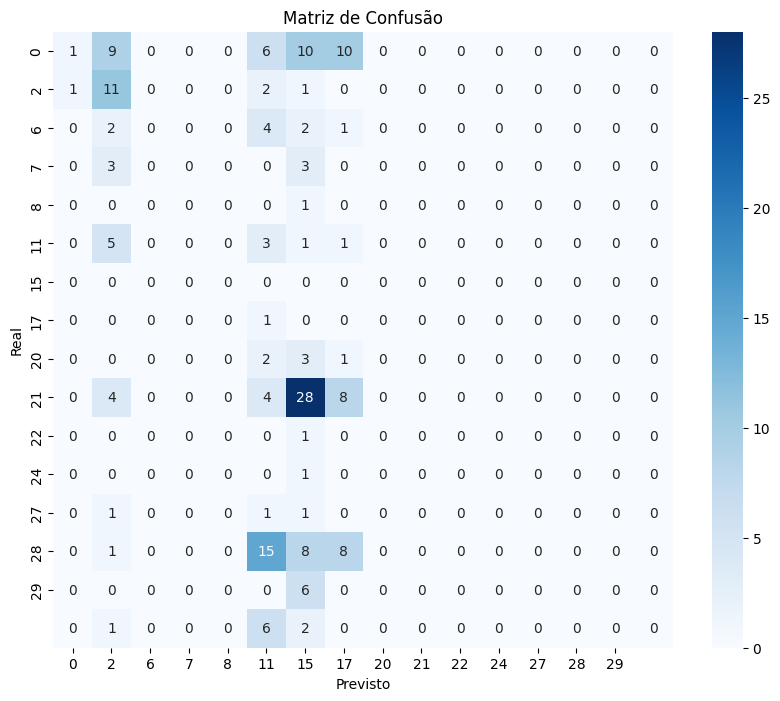

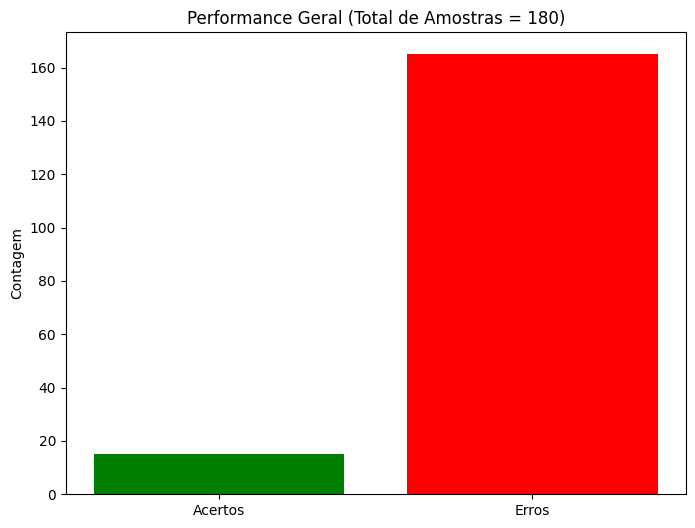

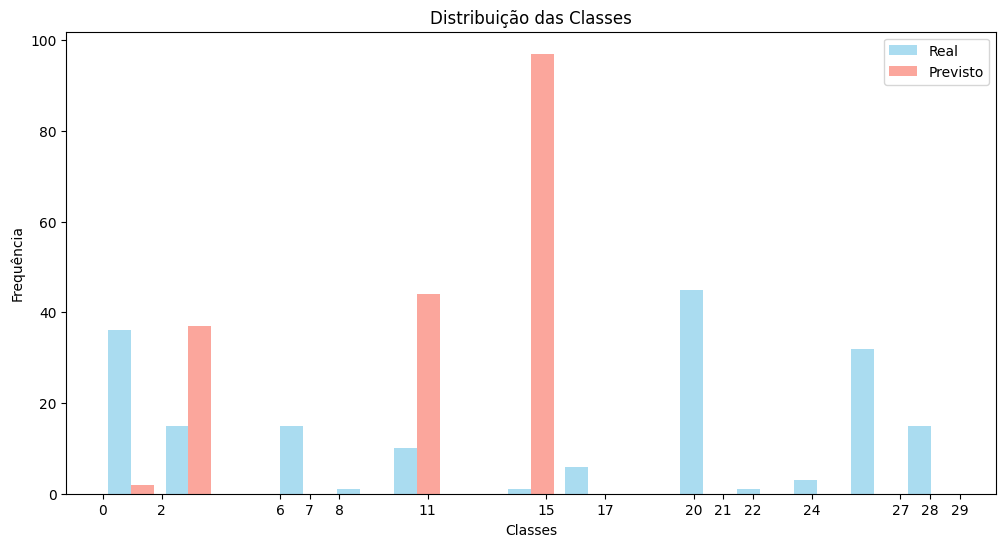

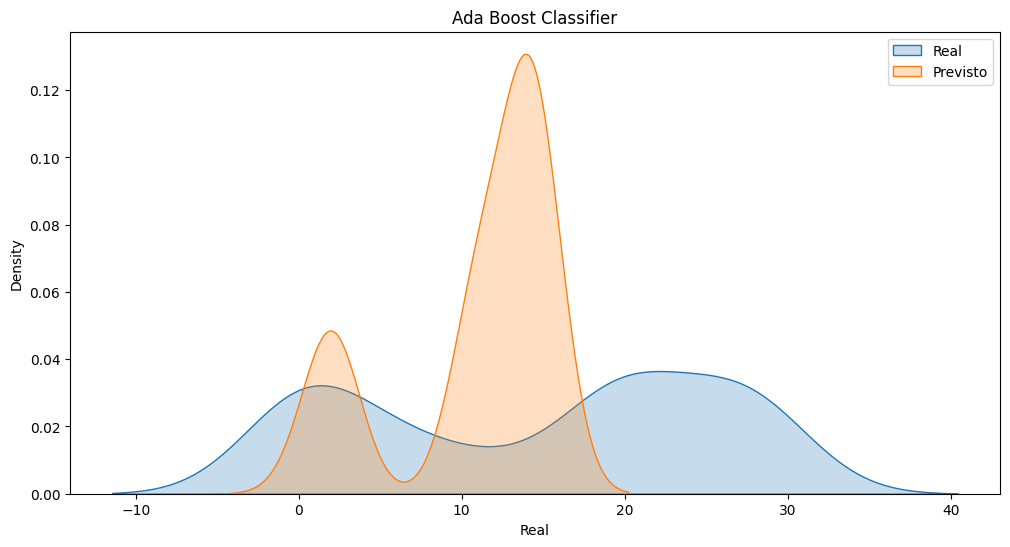

In [57]:
plot_classifier(y_best_ansatz, Ada_Boost_clf_resultados, 'Ada Boost Classifier')


#### PLOT DT CLASSIFIER

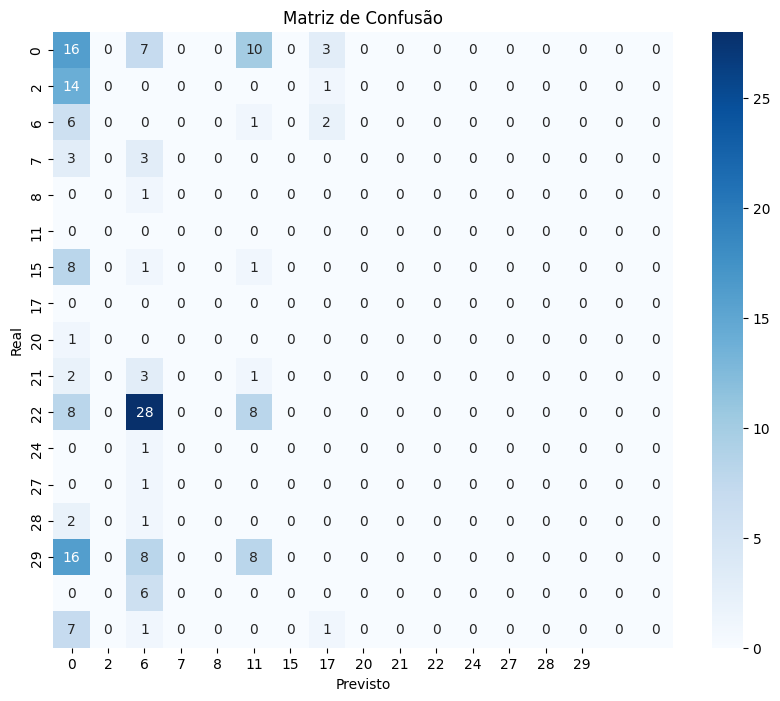

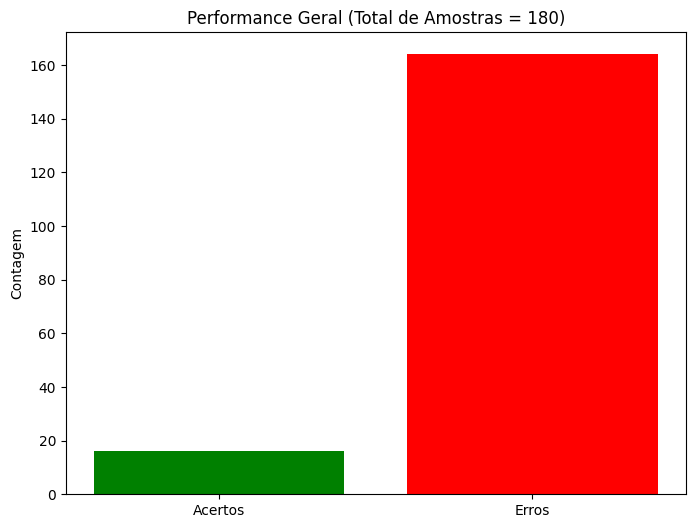

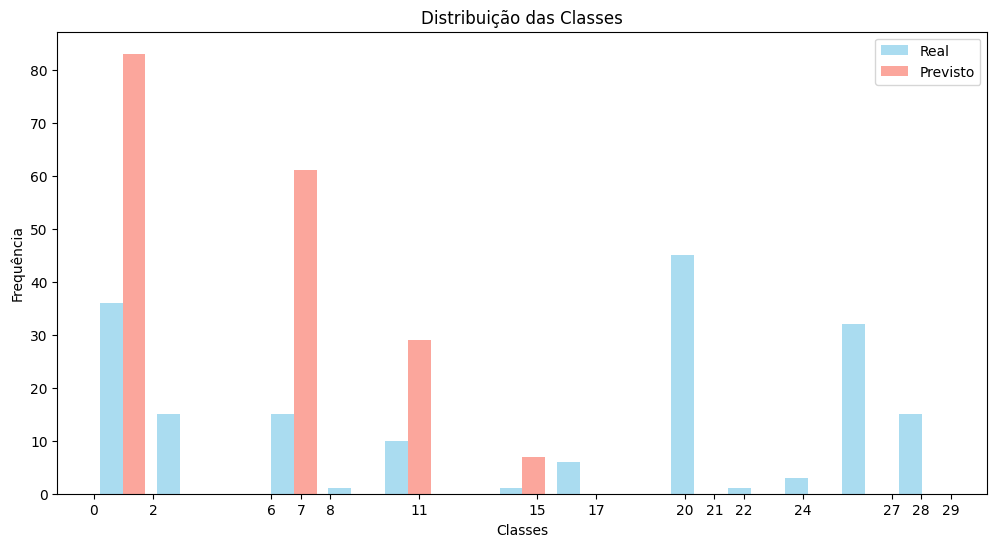

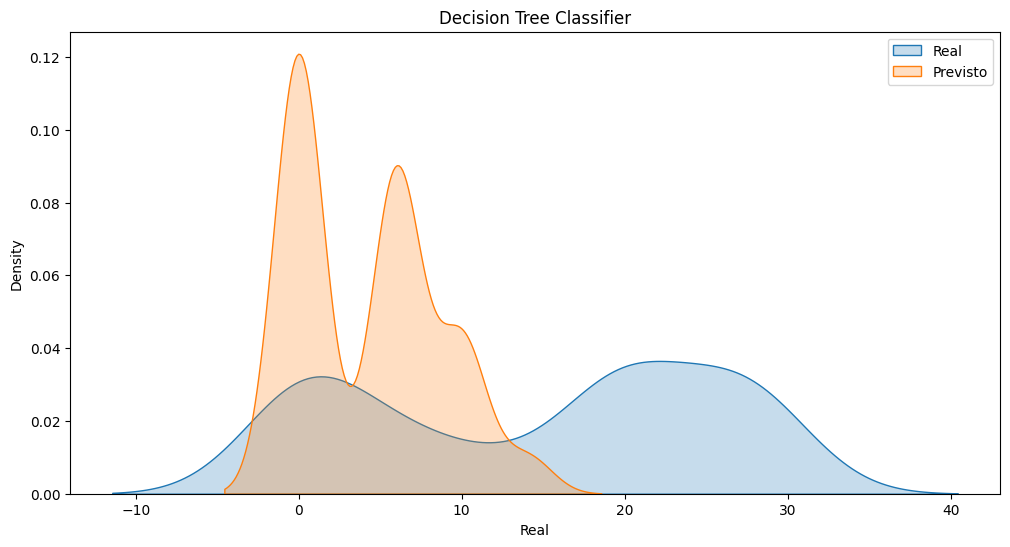

In [58]:
plot_classifier(y_best_ansatz, dt_clf_resultados, 'Decision Tree Classifier')

#### PLOT GB CLASSIFIER

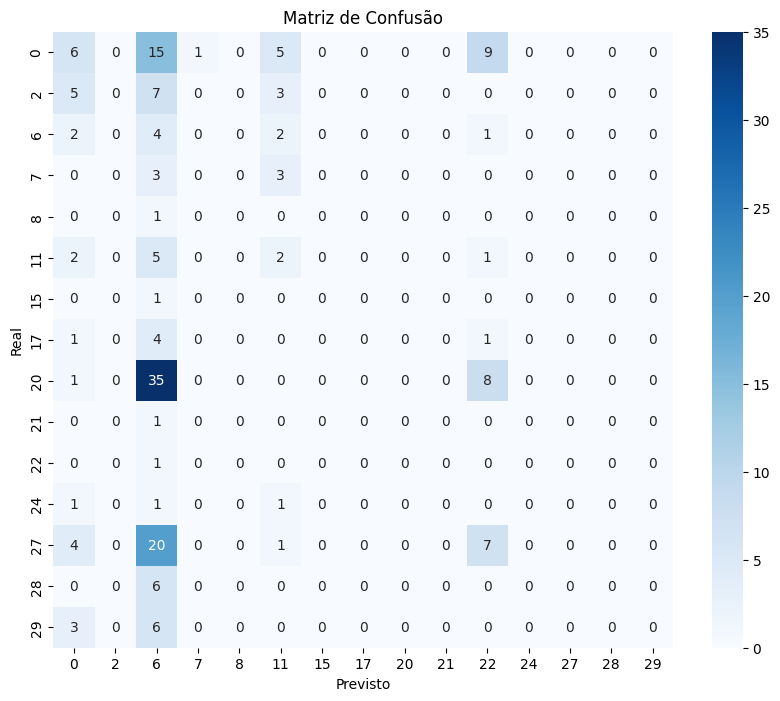

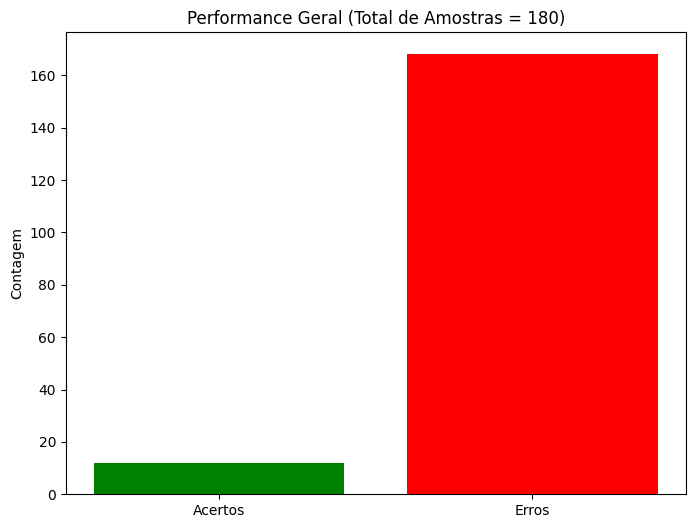

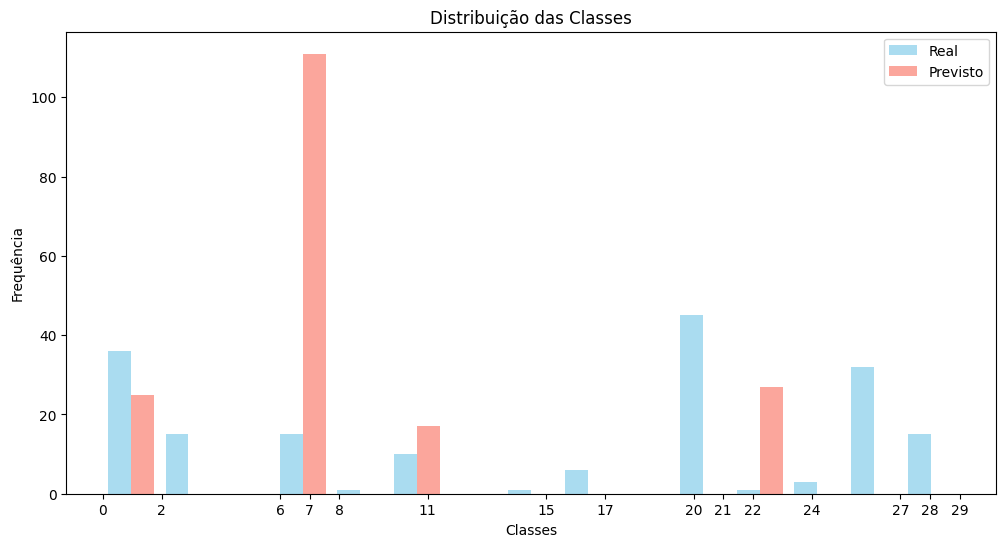

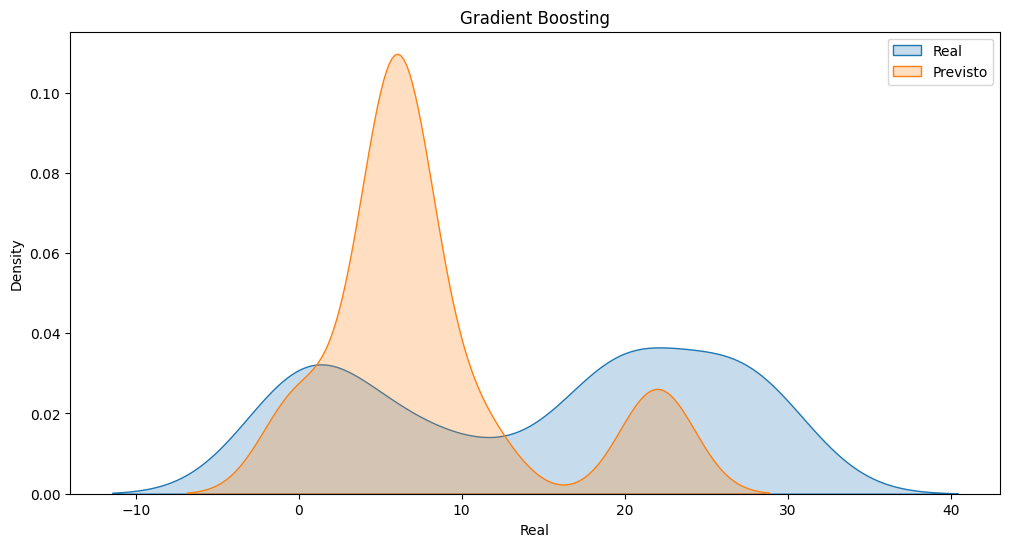

In [59]:
plot_classifier(y_best_ansatz, gb_resultados, 'Gradient Boosting')

#### PLOT SVM RBF CLASSIFIER

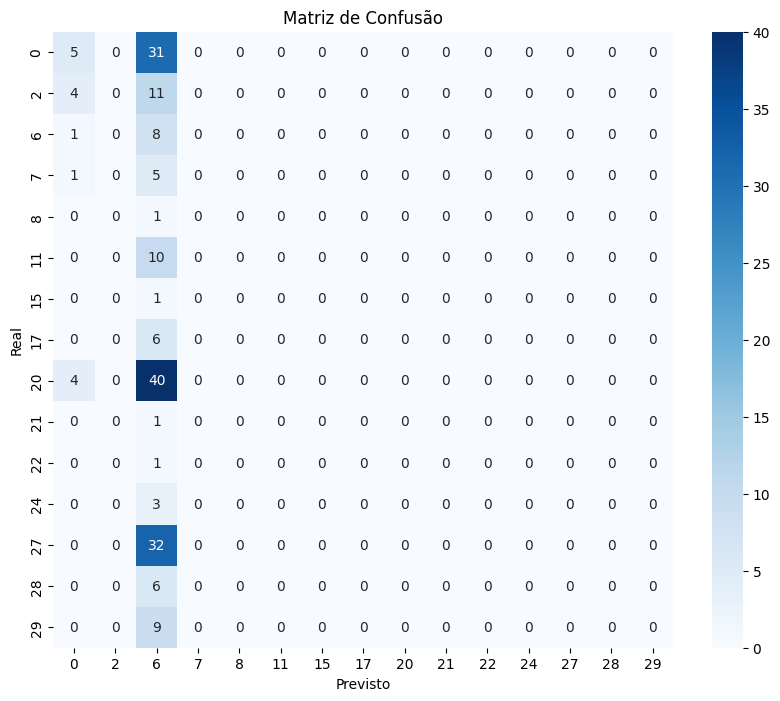

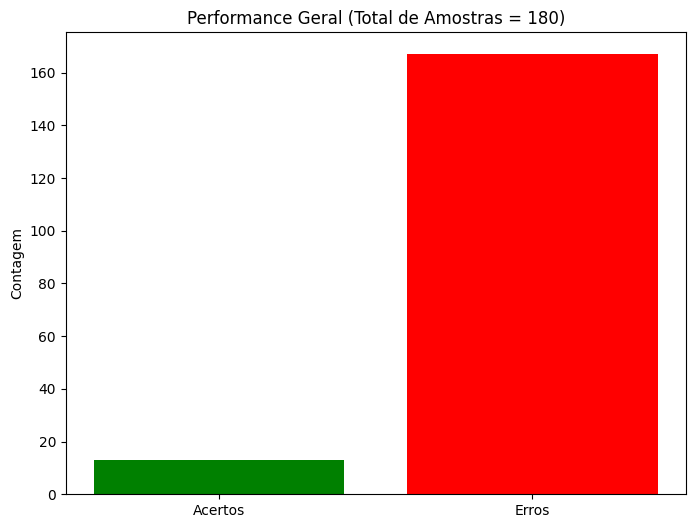

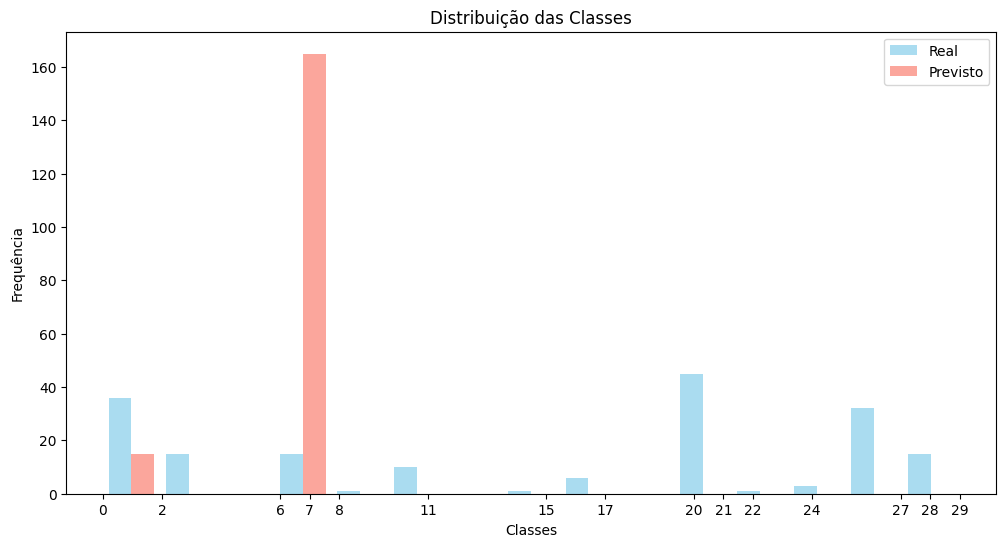

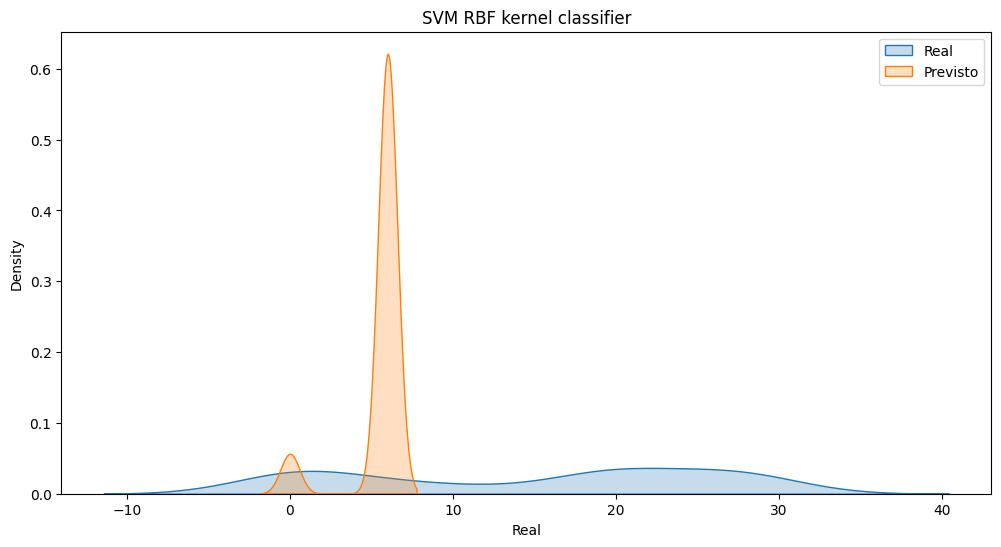

In [60]:
plot_classifier(y_best_ansatz, svm_rbf_clf_resultados, 'SVM RBF kernel classifier')

#### PLOT SVM SIGMOID CLASSIFIER

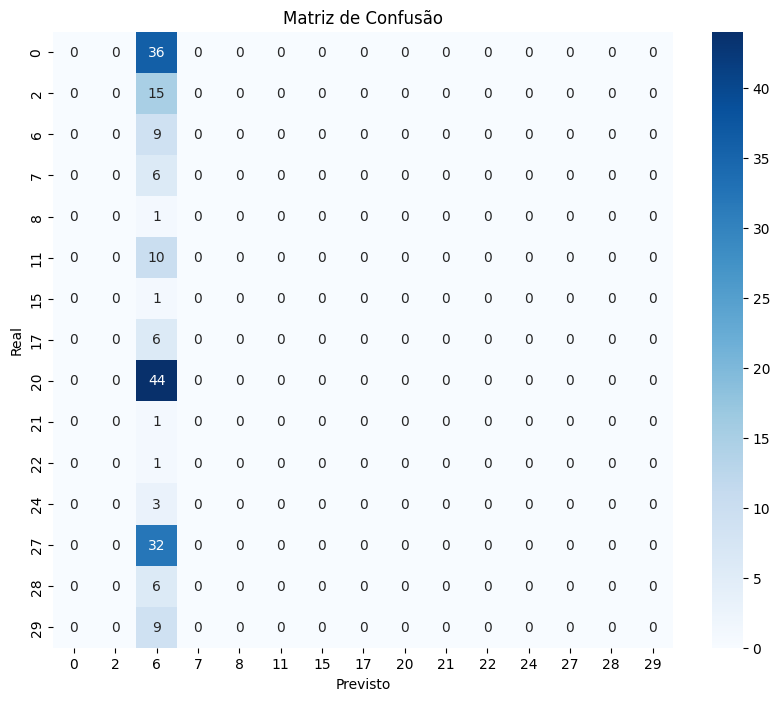

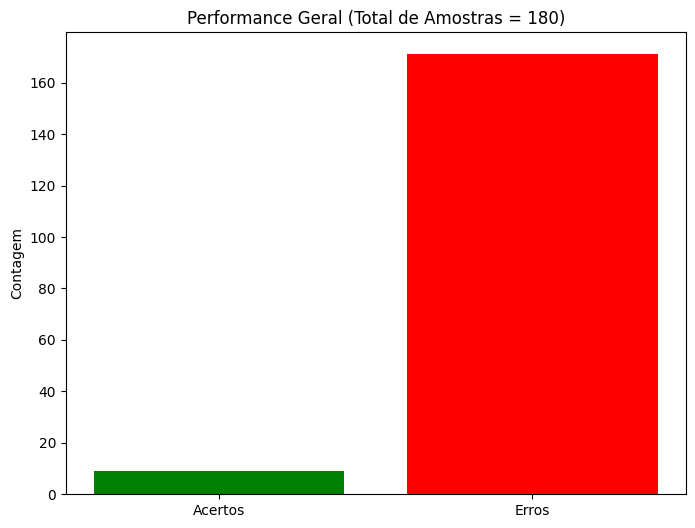

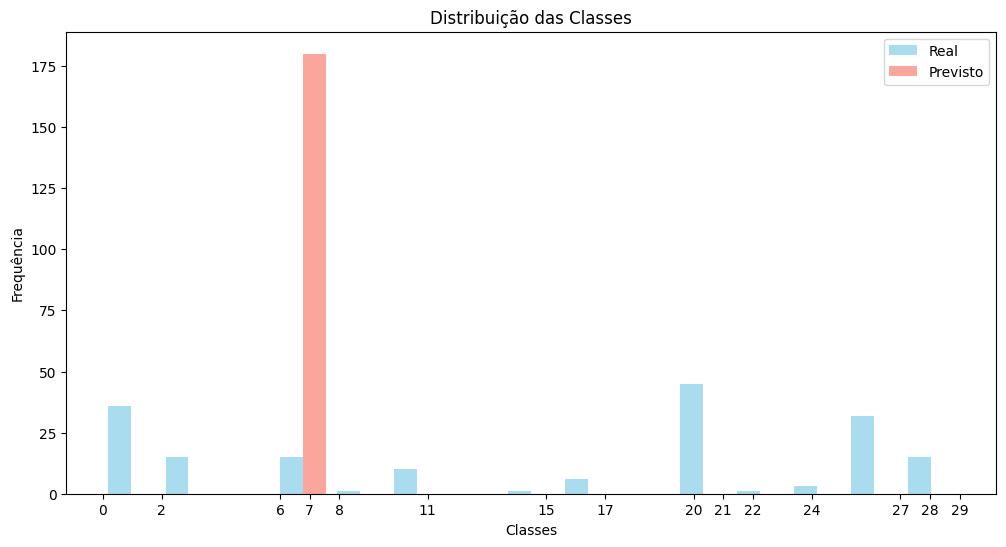

/tmp/ipykernel_4002/1150886833.py:53: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='Previsto', label='Previsto', fill=True)


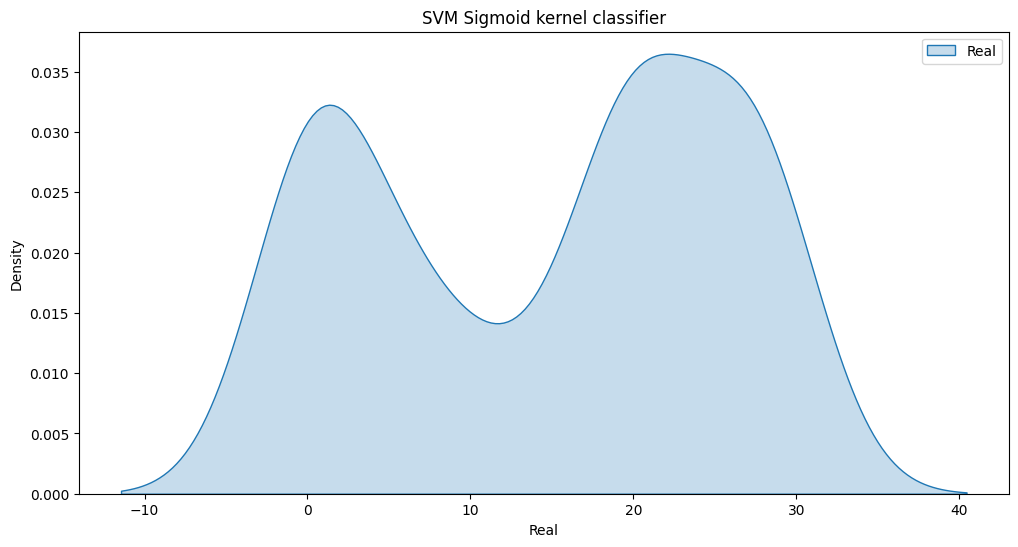

In [61]:
plot_classifier(y_best_ansatz, svm_sigmoid_clf_resultados, 'SVM Sigmoid kernel classifier')

#### PLOT SVM LINEAR CLASSIFIER

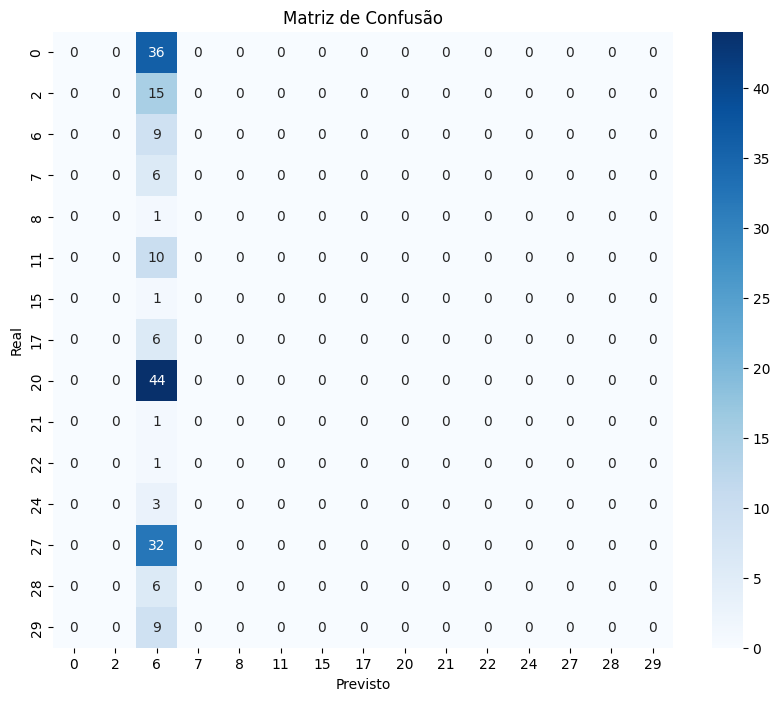

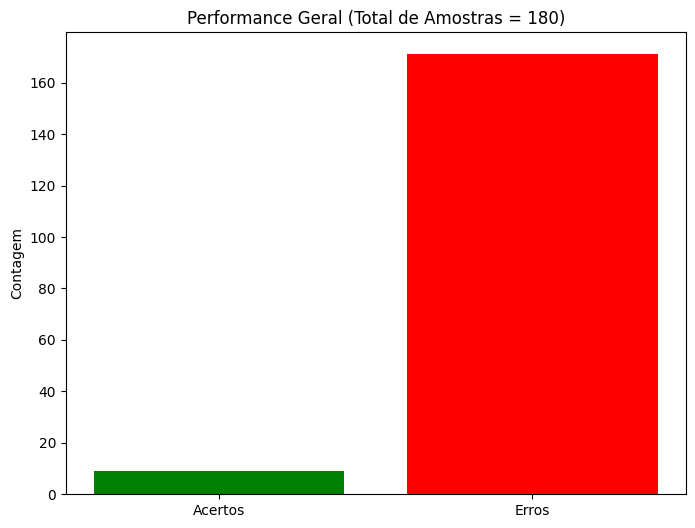

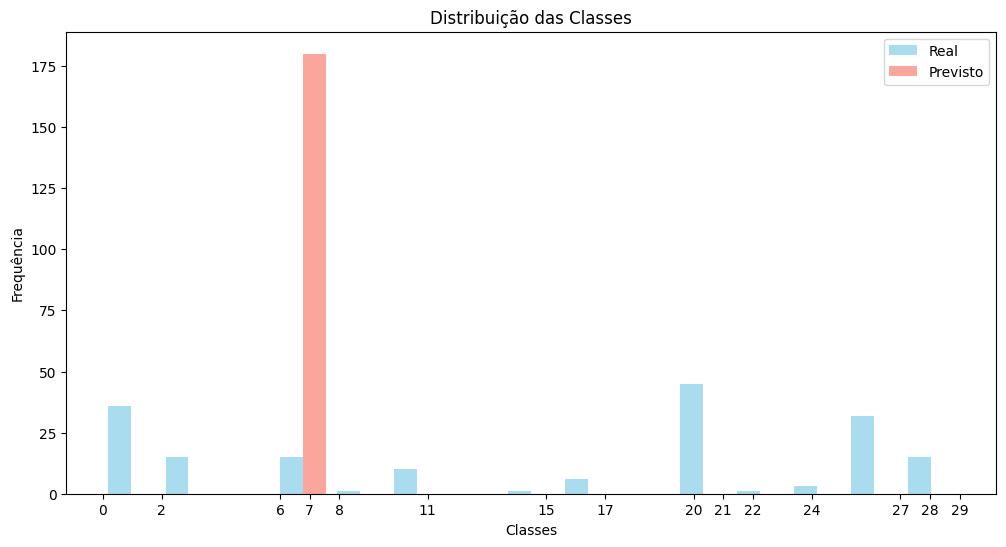

/tmp/ipykernel_4002/1150886833.py:53: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='Previsto', label='Previsto', fill=True)


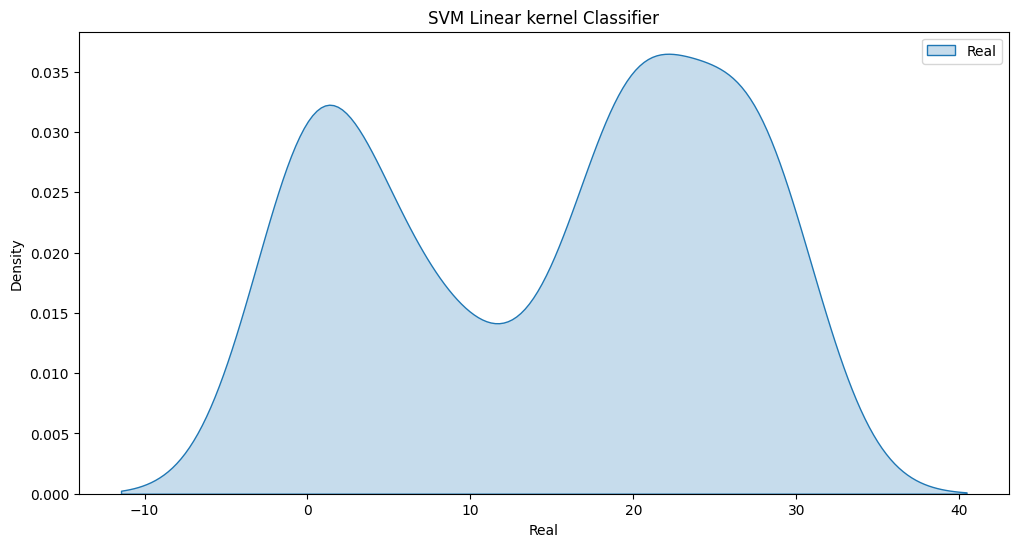

In [62]:
plot_classifier(y_best_ansatz, svm_linear_clf_resultados, 'SVM Linear kernel Classifier')

#### PLOT MLP 500 CLASSIFIER

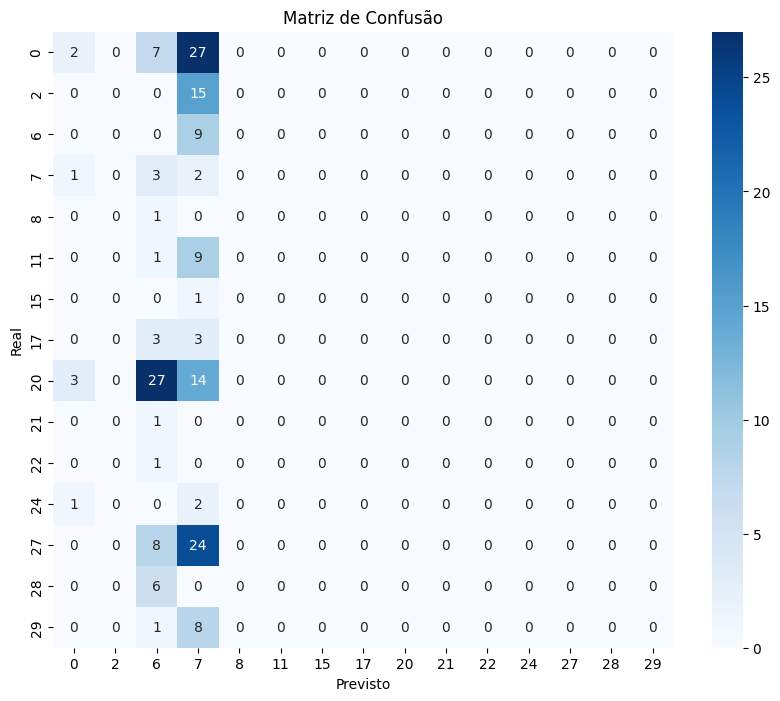

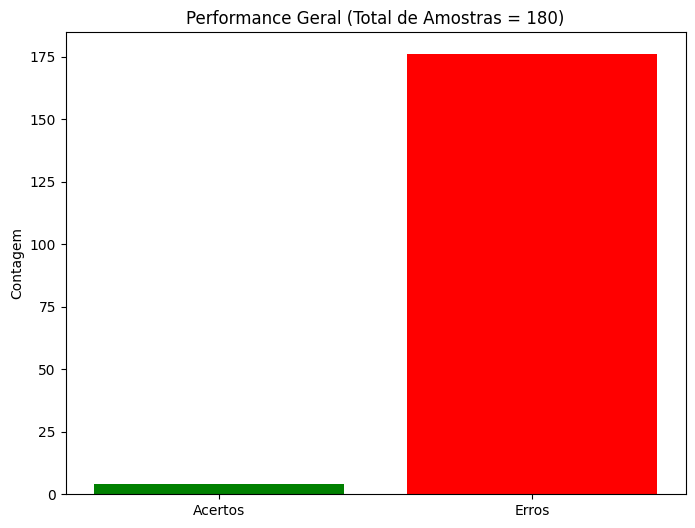

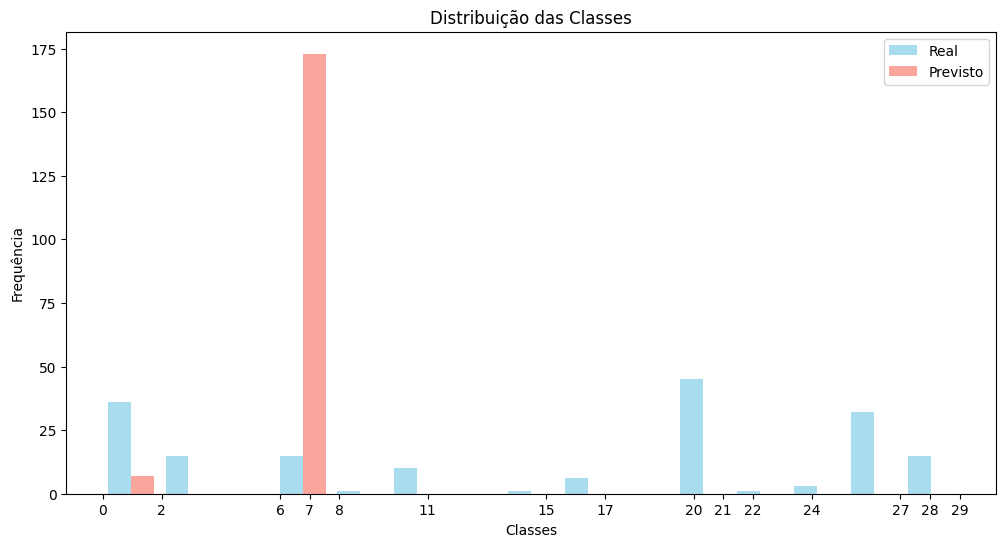

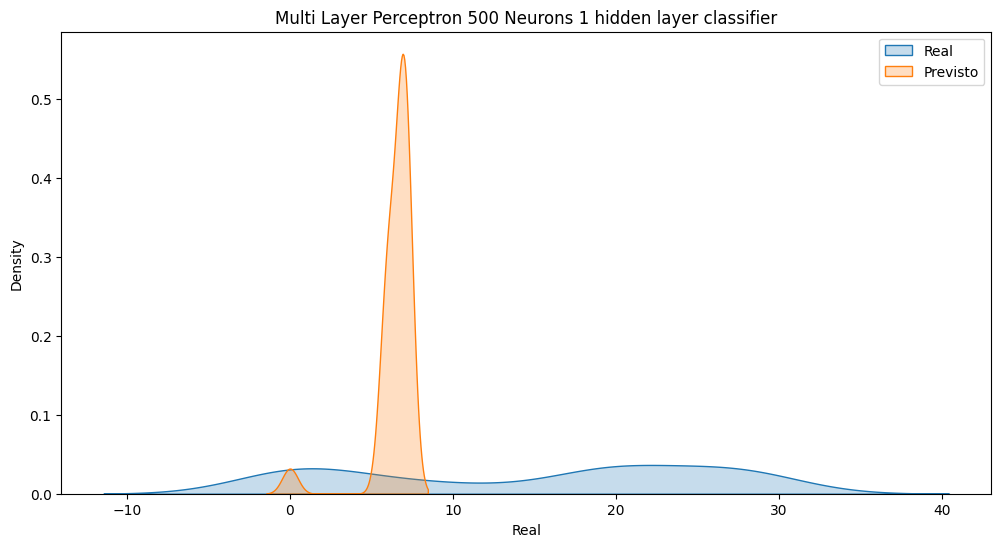

In [63]:
plot_classifier(y_best_ansatz, mlp_500_clf_resultados, 'Multi Layer Perceptron 500 Neurons 1 hidden layer classifier')

#### PLOT MLP 3 HIDDEN LAYERS 100 NEURONS CLASSIFIER

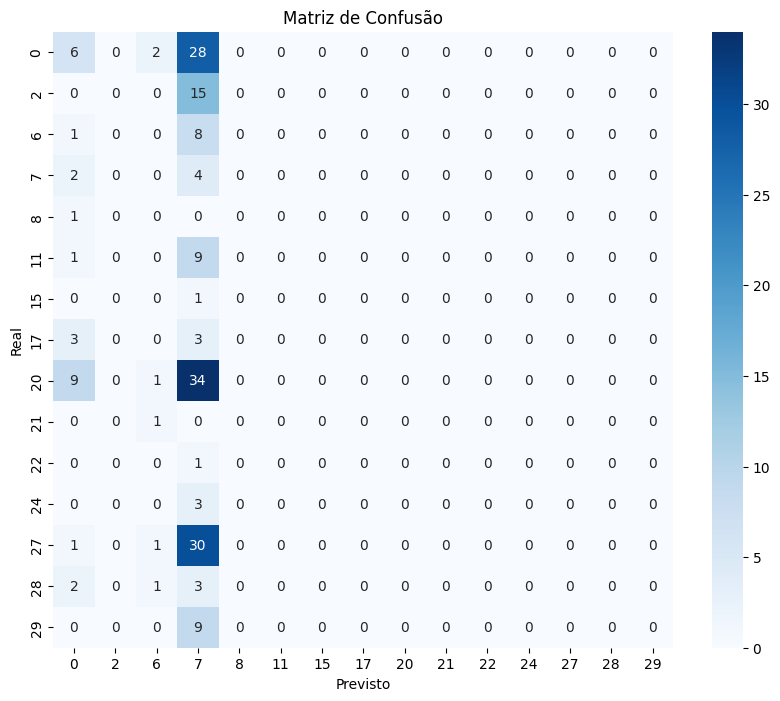

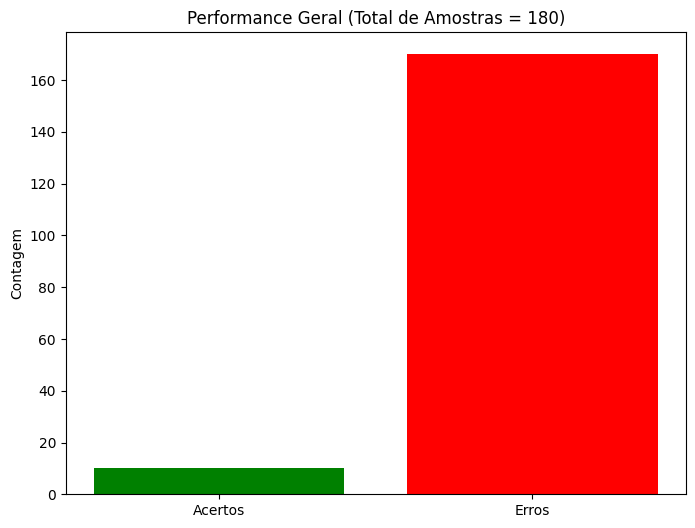

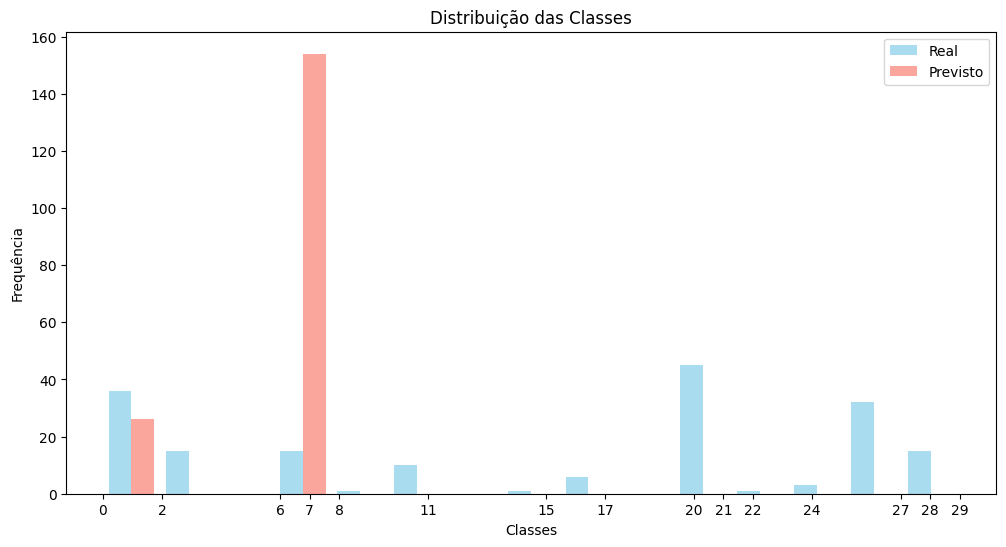

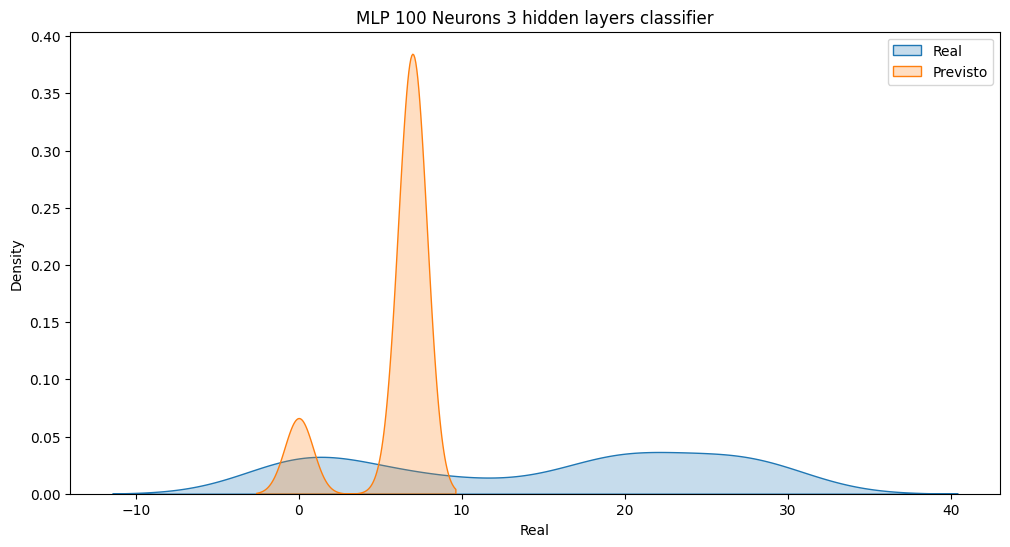

In [64]:
plot_classifier(y_best_ansatz, mlp_100_100_100_clf_resultados, 'MLP 100 Neurons 3 hidden layers classifier')

#### PLOT MLP 3 HIDDEN LAYERS 500 NEURONS CLASSIFIER

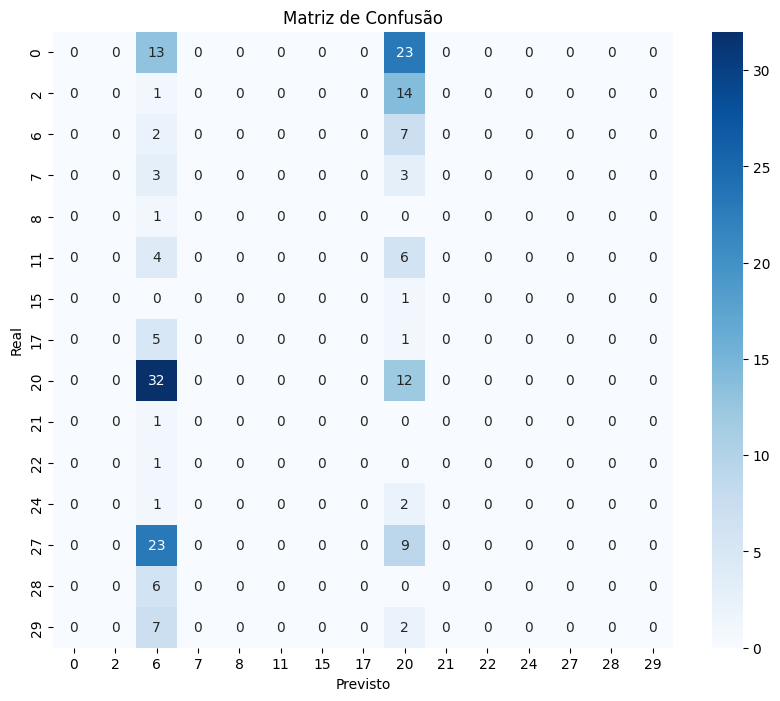

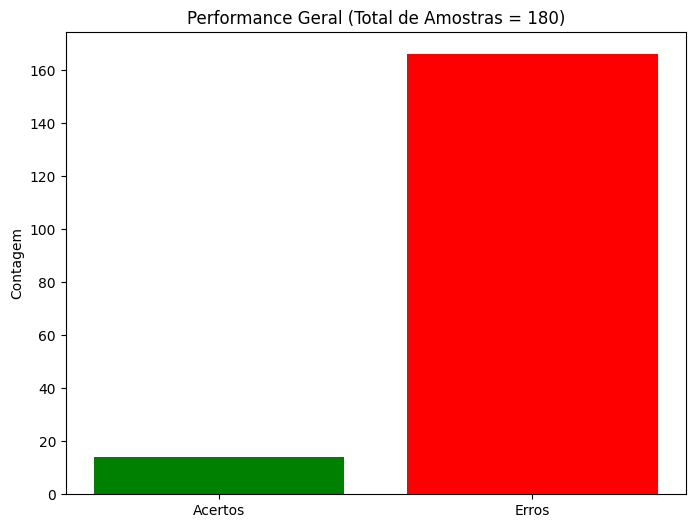

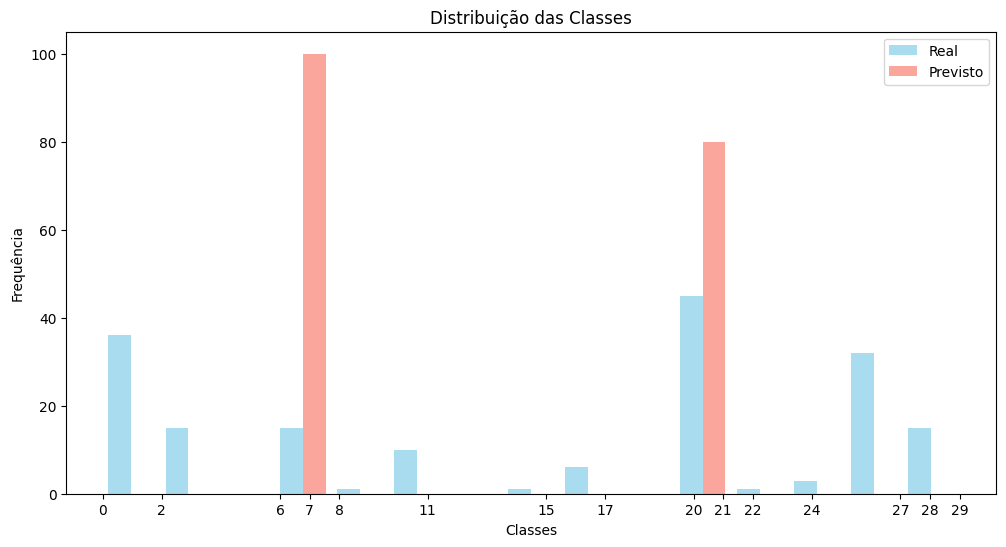

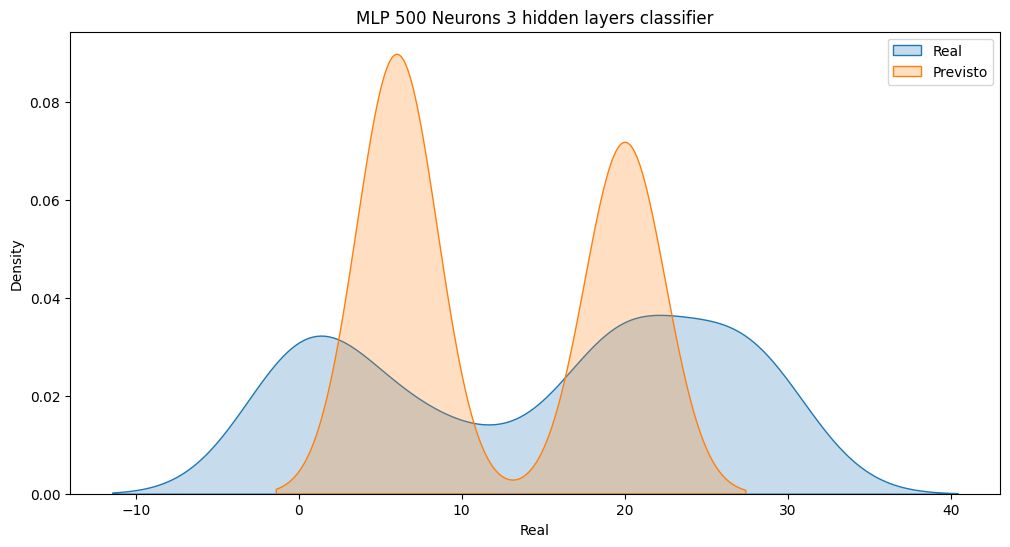

In [65]:
plot_classifier(y_best_ansatz, mlp_500_500_500_clf_resultados, 'MLP 500 Neurons 3 hidden layers classifier')

#### PLOT ADA BOOST REGRESSOR

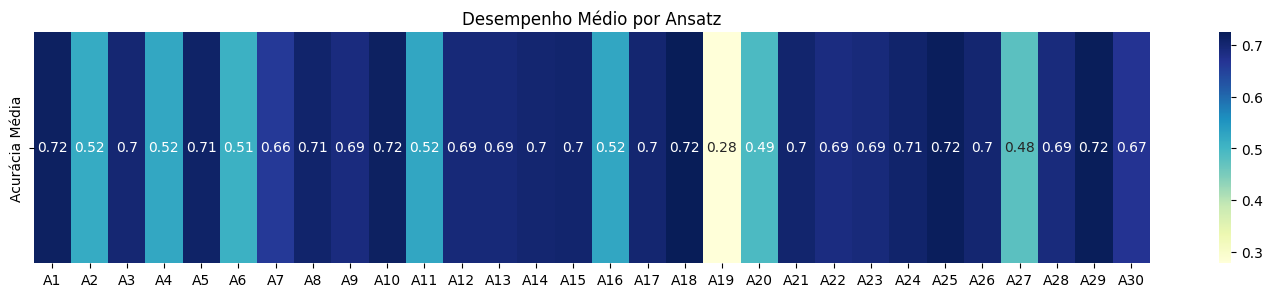

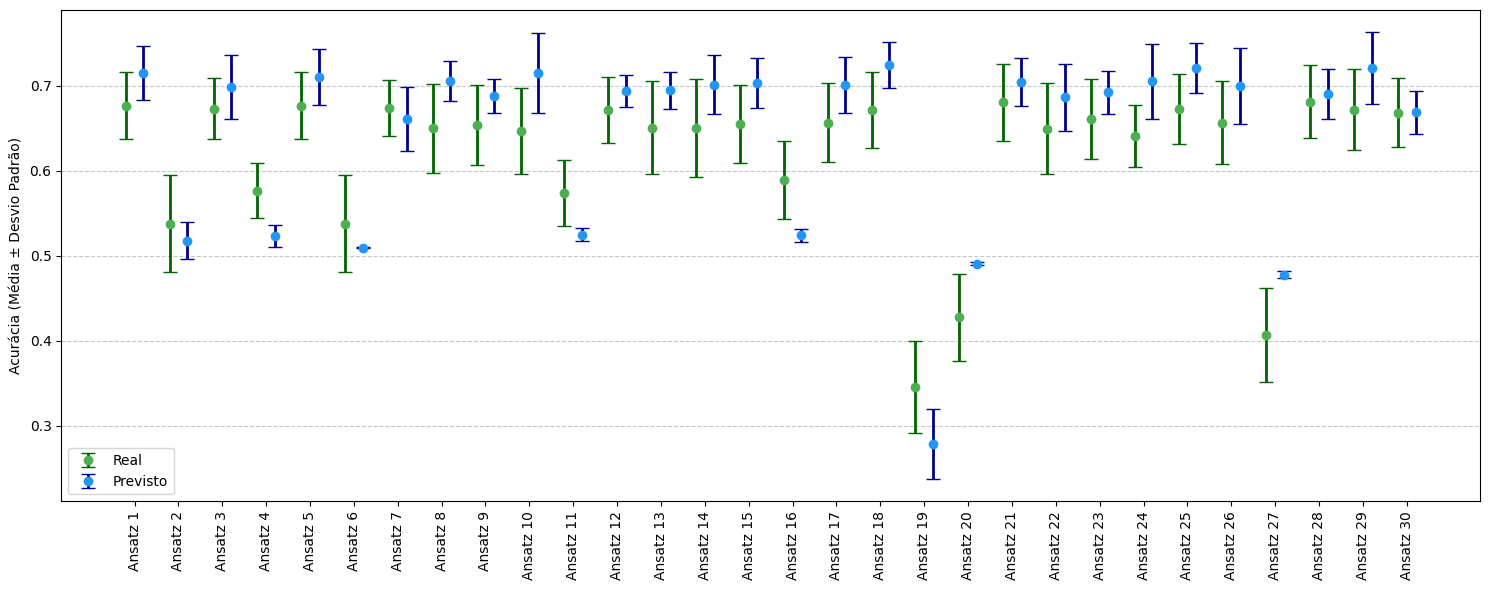

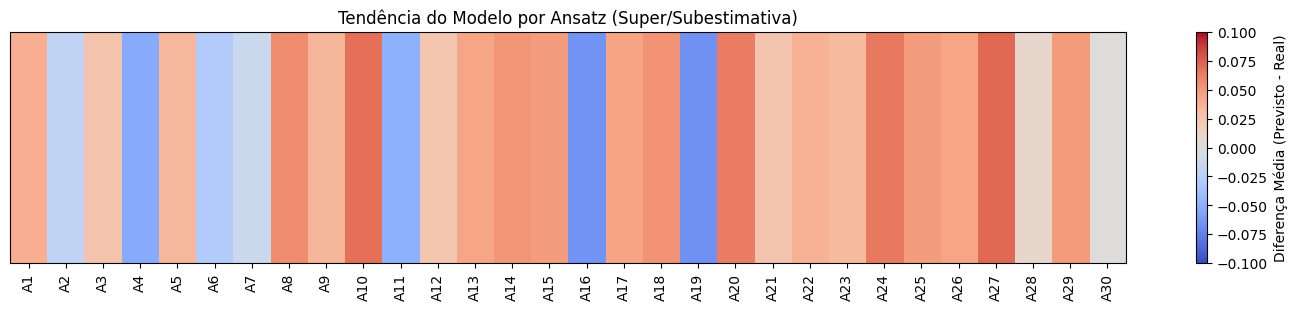

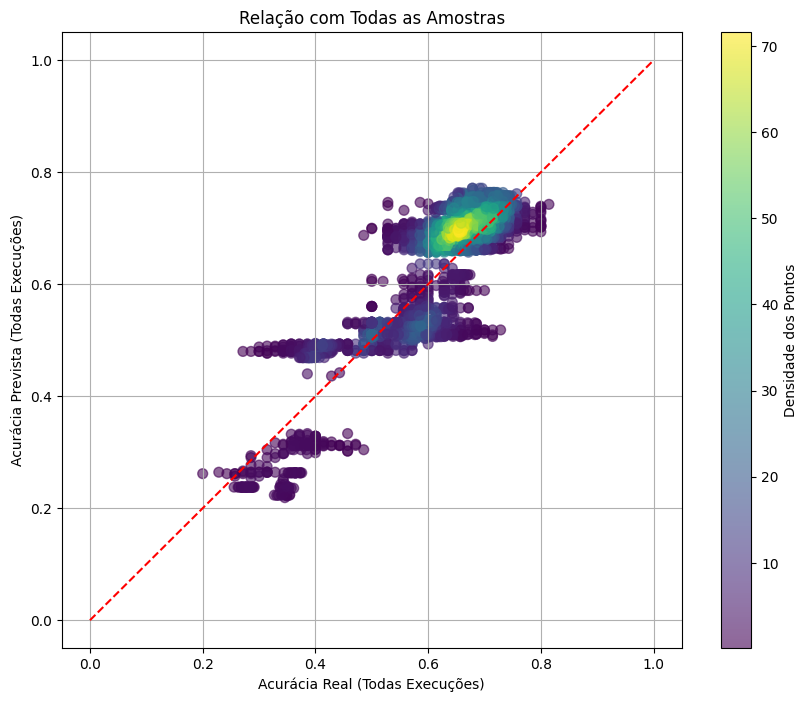

In [34]:
plot_regressor(y, Ada_Boost_rgs_resultados, '')

#### PLOT DT REGRESSOR

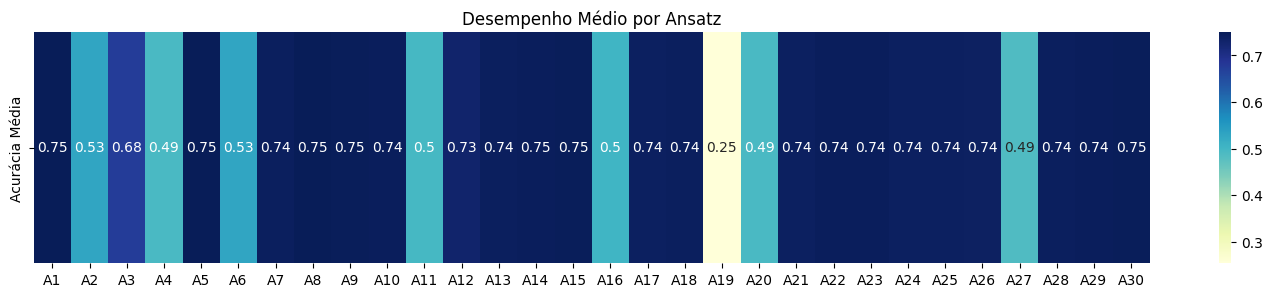

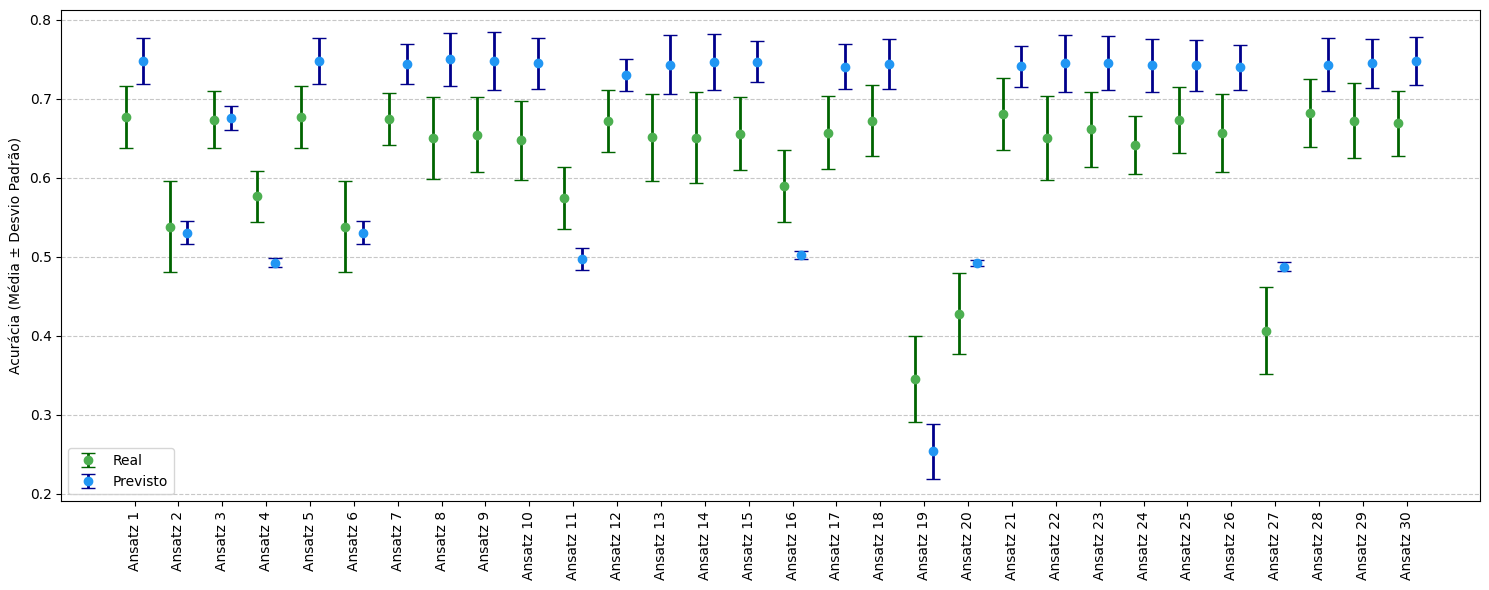

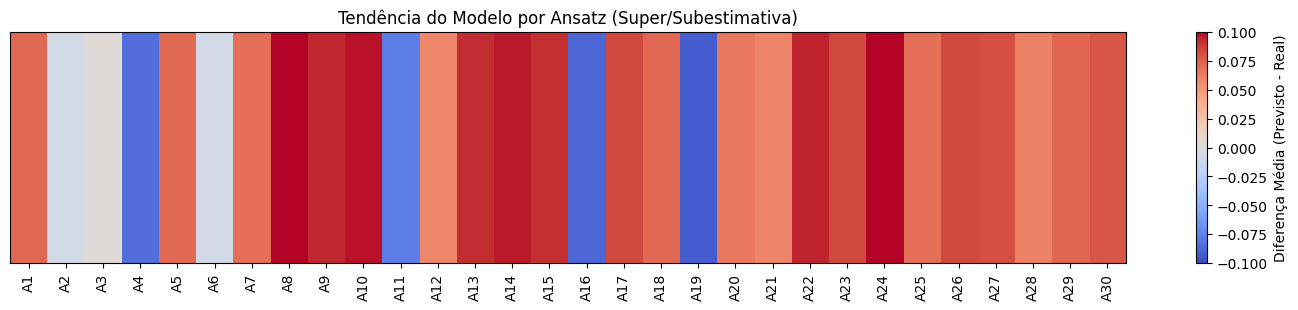

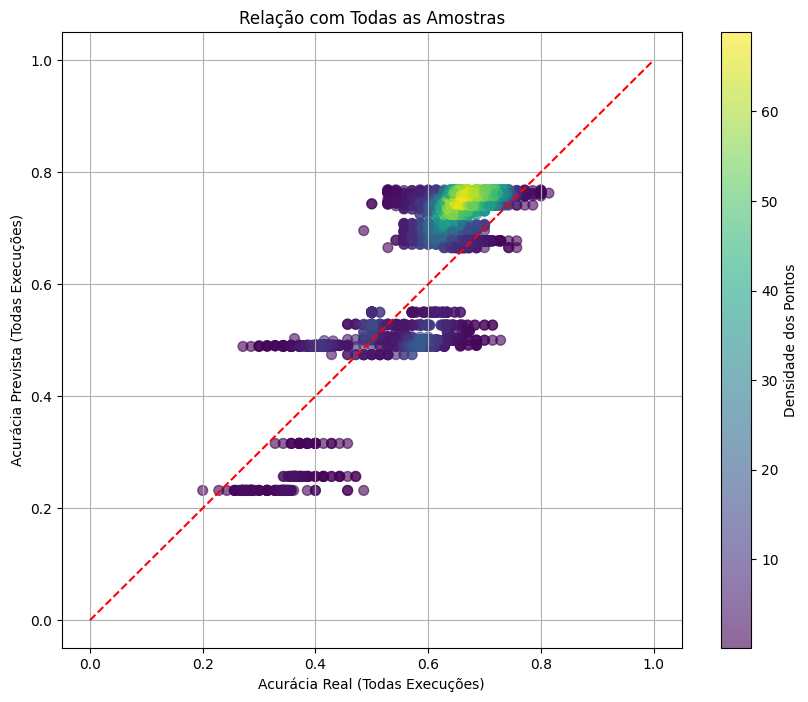

In [35]:
plot_regressor(y, dt_rgs_resultados, '')

#### PLOT SVM RBF REGRESSOR

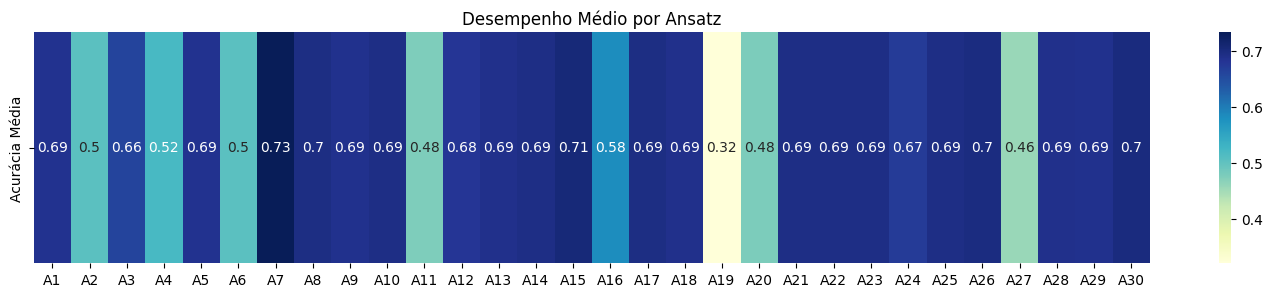

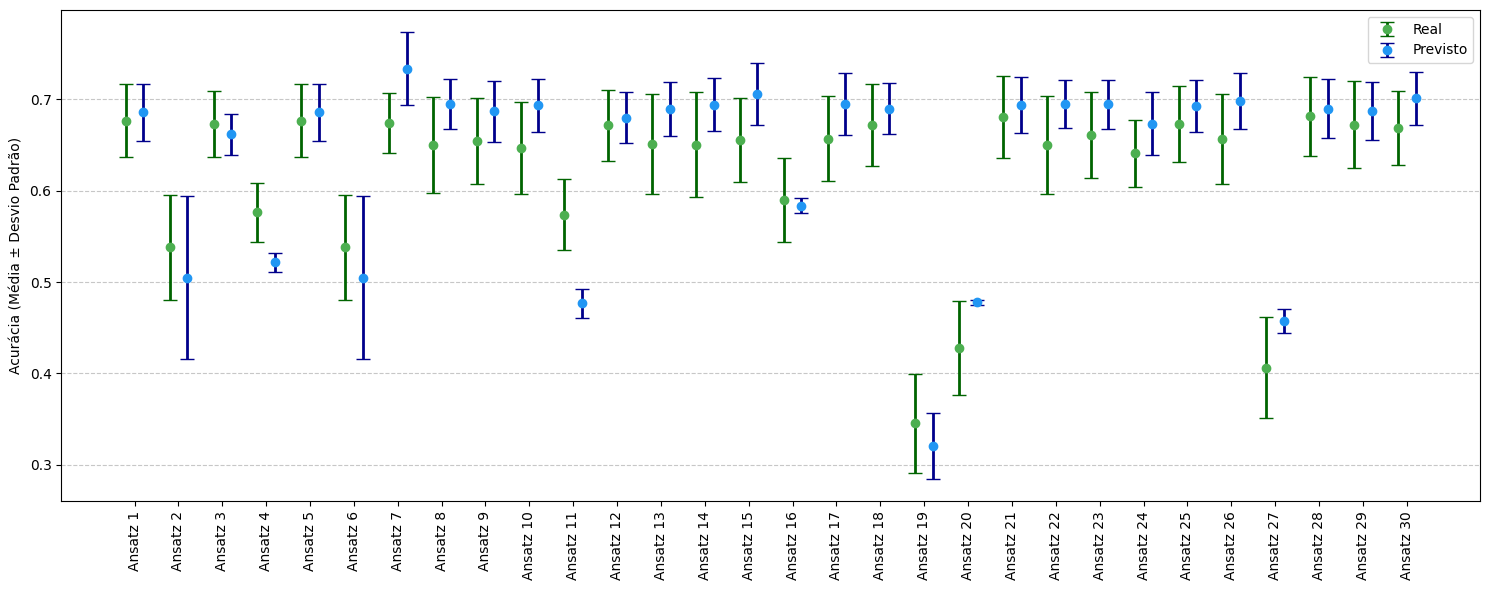

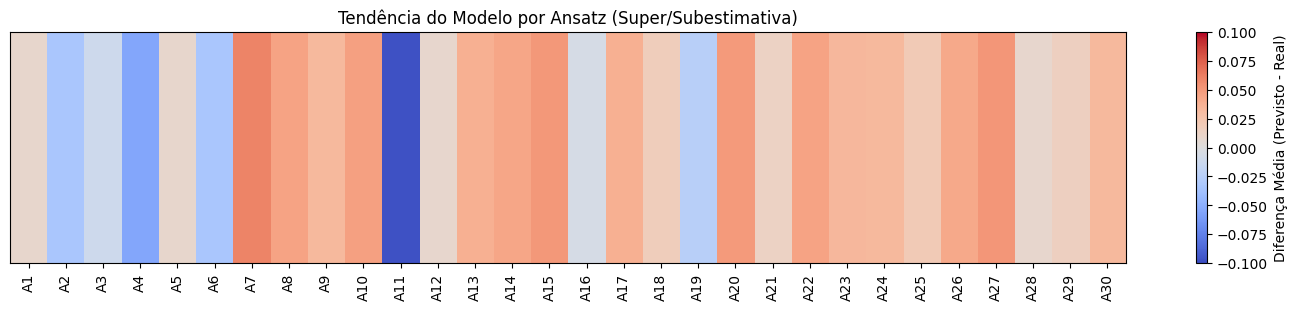

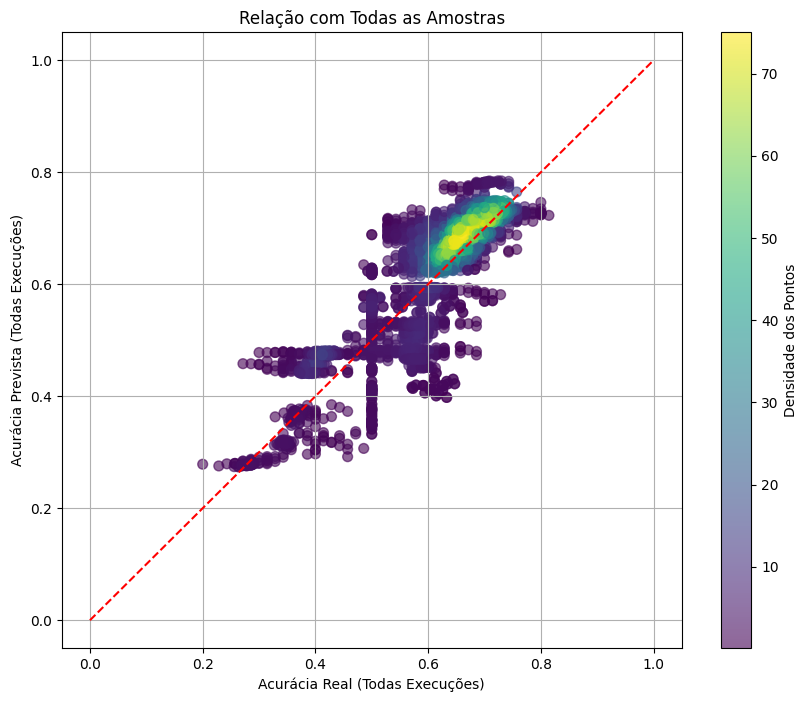

In [36]:
plot_regressor(y, svm_rbf_rgs_resultados, '')

#### PLOT SVM SIGMOID REGRESSOR

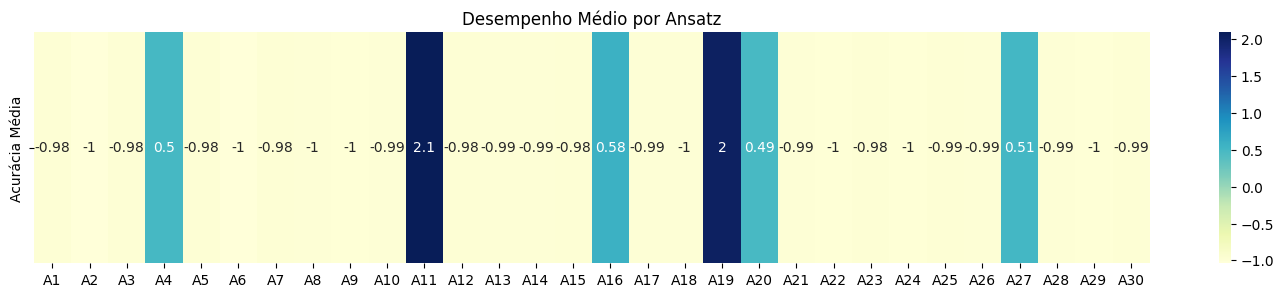

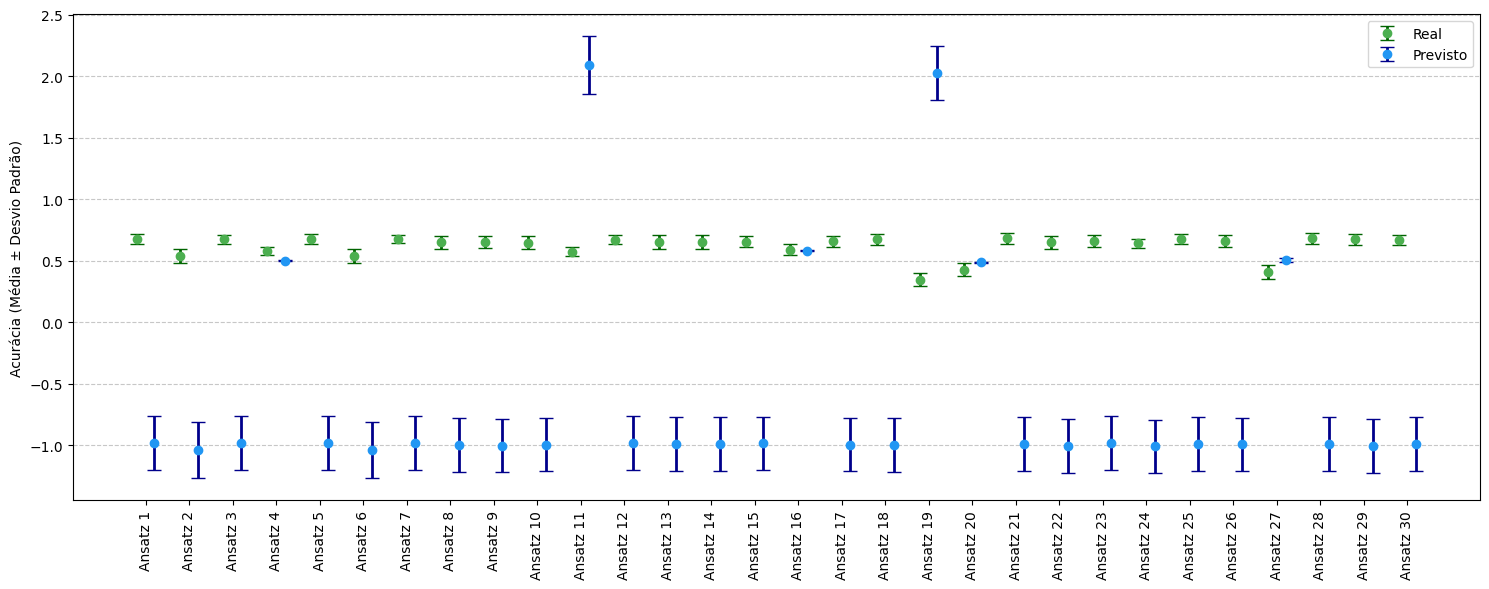

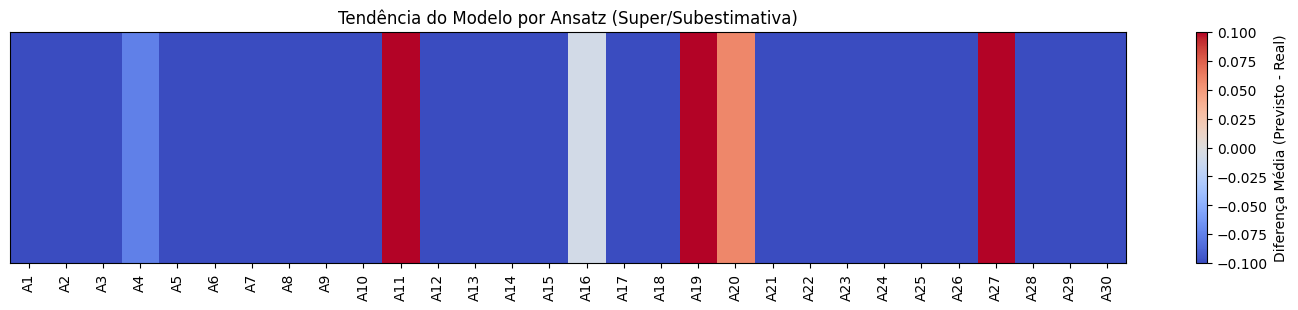

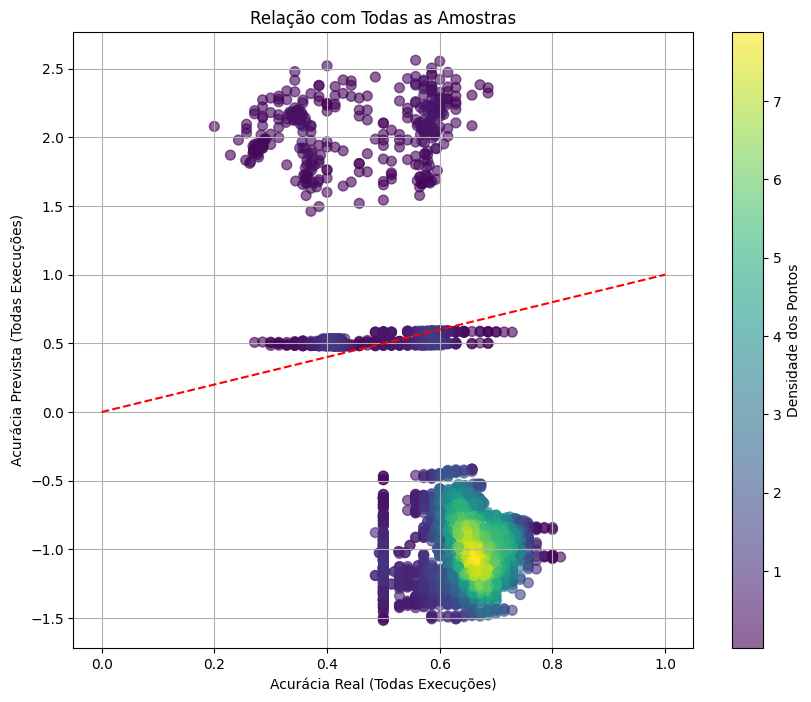

In [37]:
plot_regressor(y, svm_sigmoid_rgs_resultados, '')

#### PLOT SVM LINEAR REGRESSOR

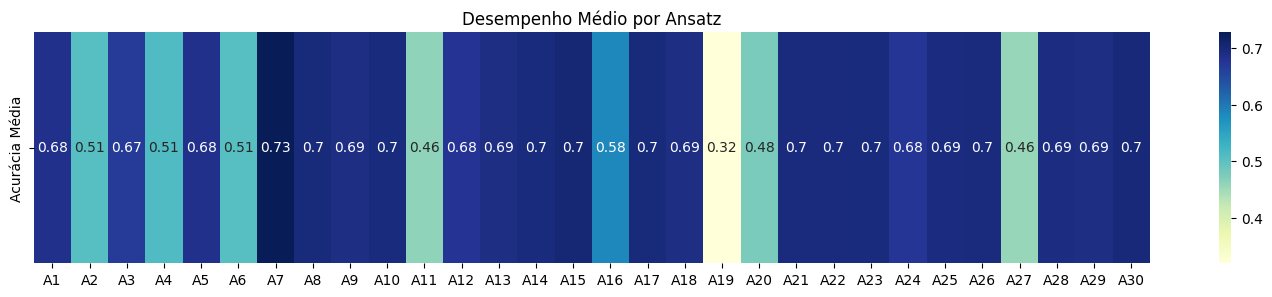

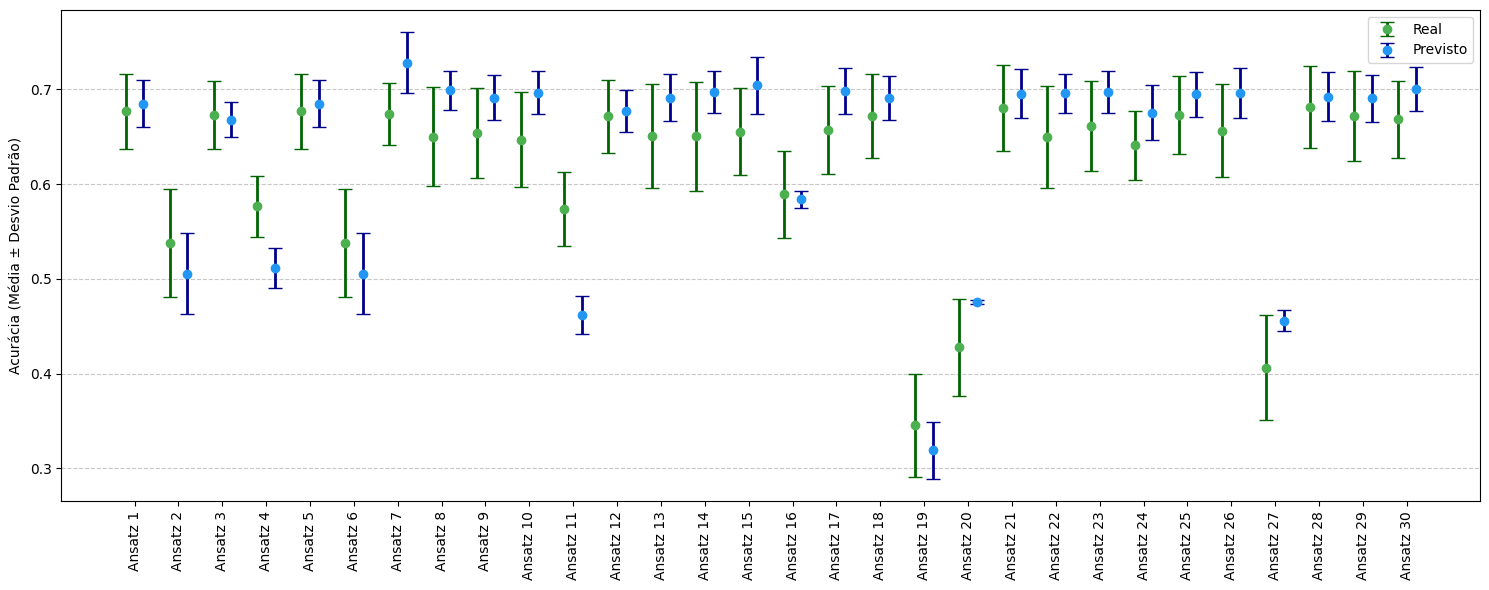

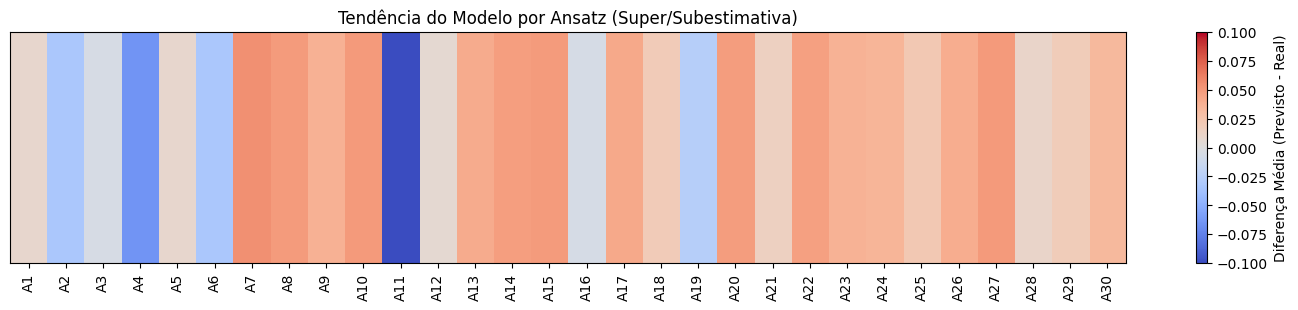

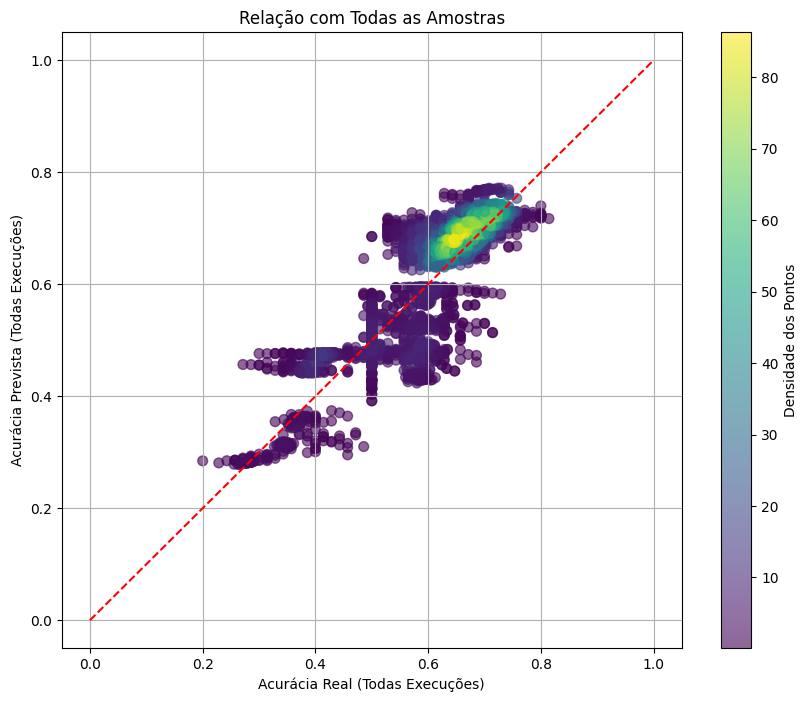

In [38]:
plot_regressor(y, svm_linear_rgs_resultados, '')

#### PLOT MLP 500

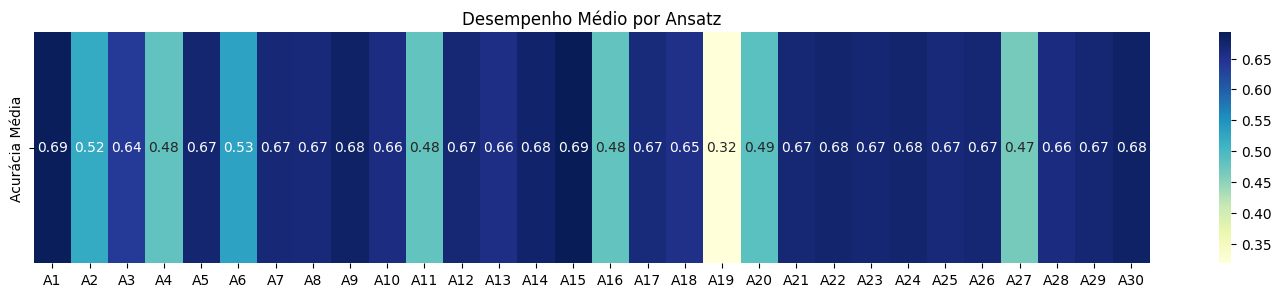

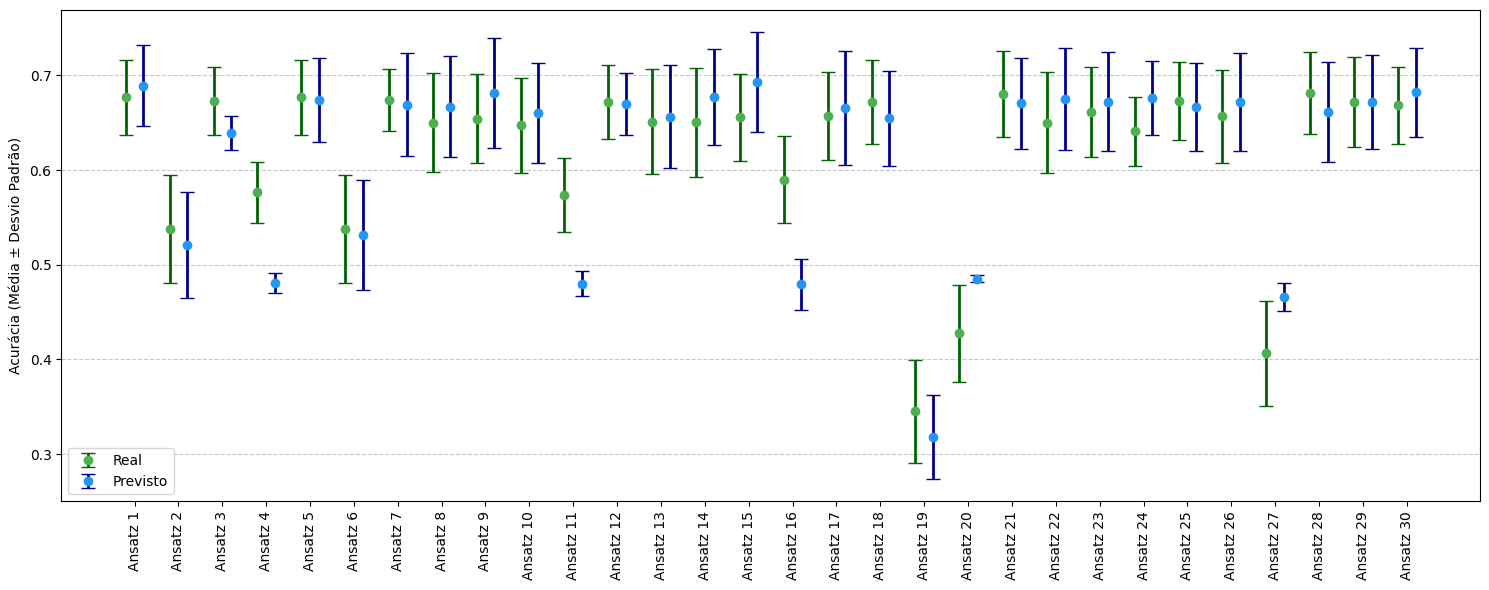

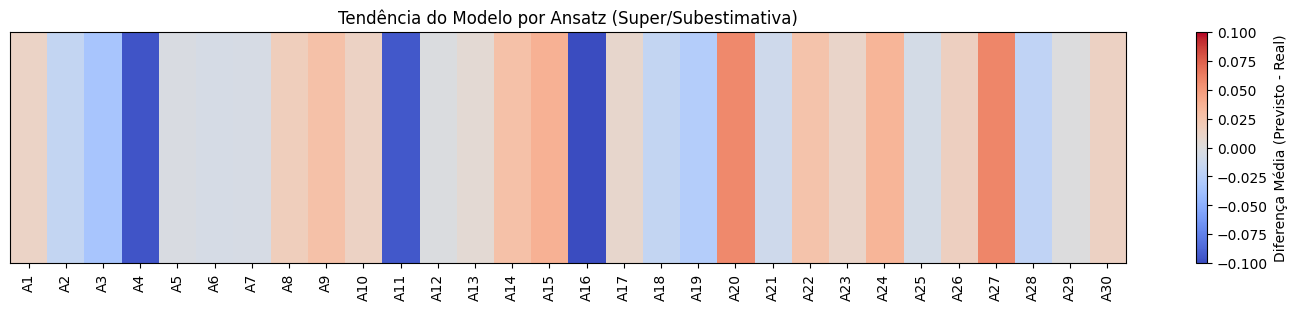

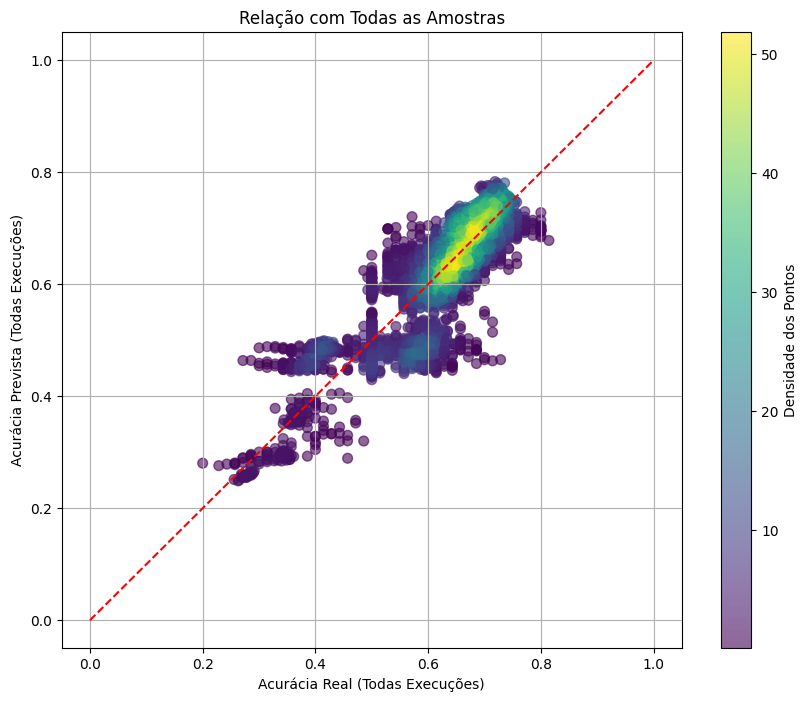

In [39]:
plot_regressor(y, mlp_500_rgs_resultados, '')

In [40]:
print(mlp_500_rgs_resultados)

[[0.640672   0.43829572 0.6354203  ... 0.5967863  0.6059892  0.6223863 ]
 [0.63399476 0.45213863 0.6297403  ... 0.5917879  0.6068429  0.6236173 ]
 [0.6064475  0.43753877 0.6081333  ... 0.56436545 0.5718095  0.5892774 ]
 ...
 [0.7521561  0.5891314  0.666373   ... 0.7366149  0.7393809  0.74312925]
 [0.7434779  0.5807475  0.6588143  ... 0.7280883  0.73040926 0.7349671 ]
 [0.7511429  0.59090877 0.66526234 ... 0.7367368  0.73981595 0.74287164]]


#### PLOT MLP 100 100 100 REGRESSOR

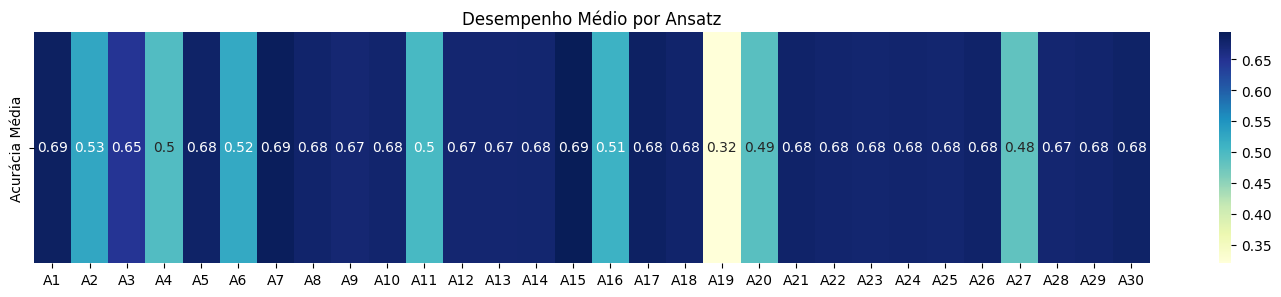

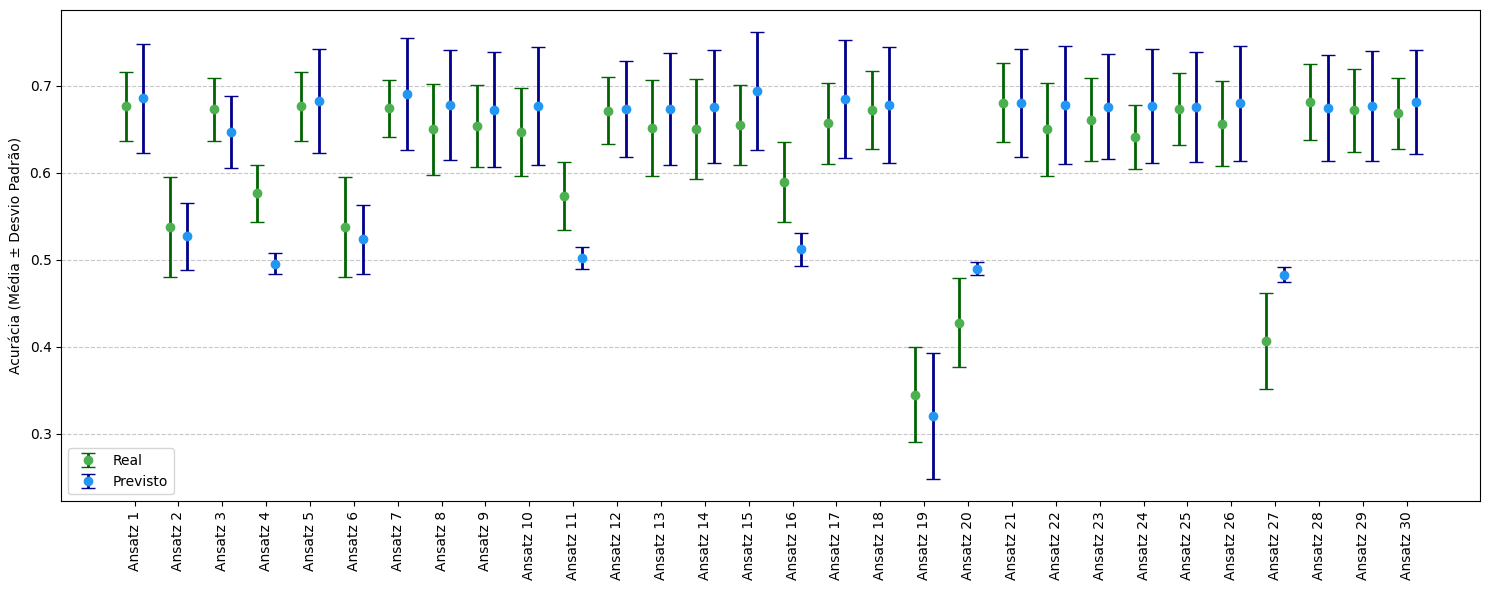

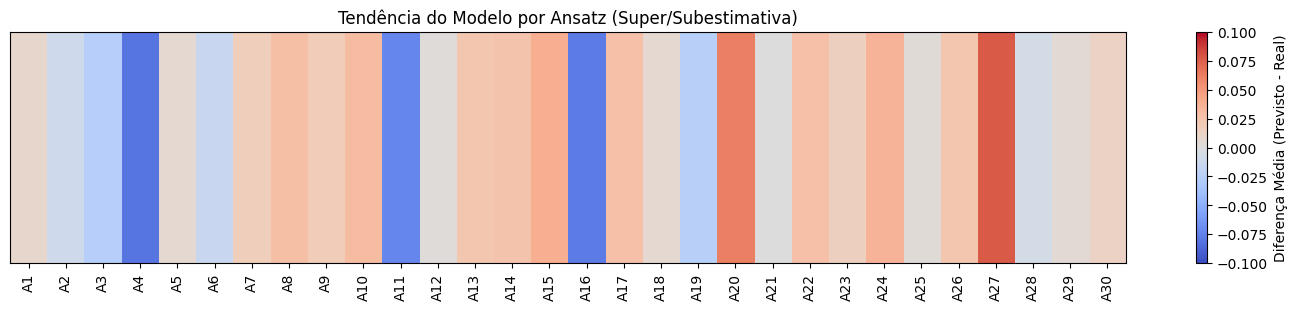

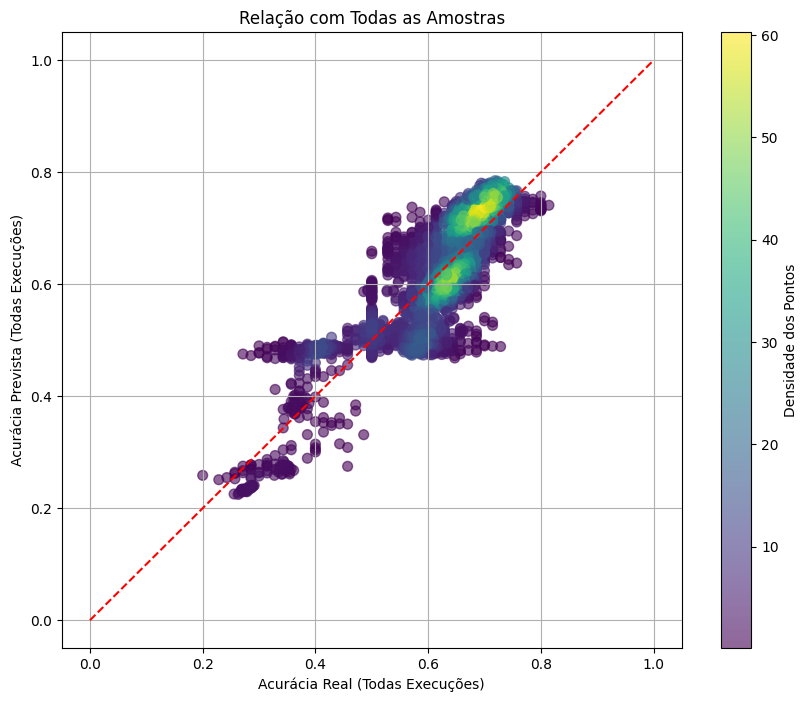

In [41]:
plot_regressor(y, mlp_100_100_100_rgs_resultados, '')

#### PLOT MLP 500 500 500 REGRESSOR

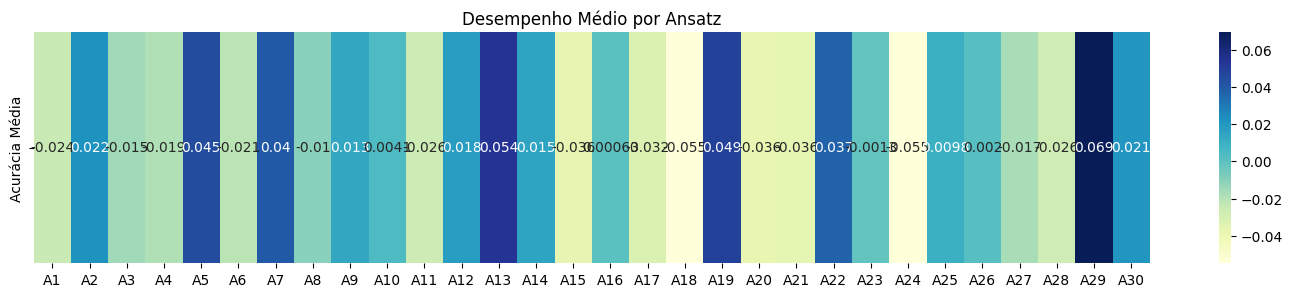

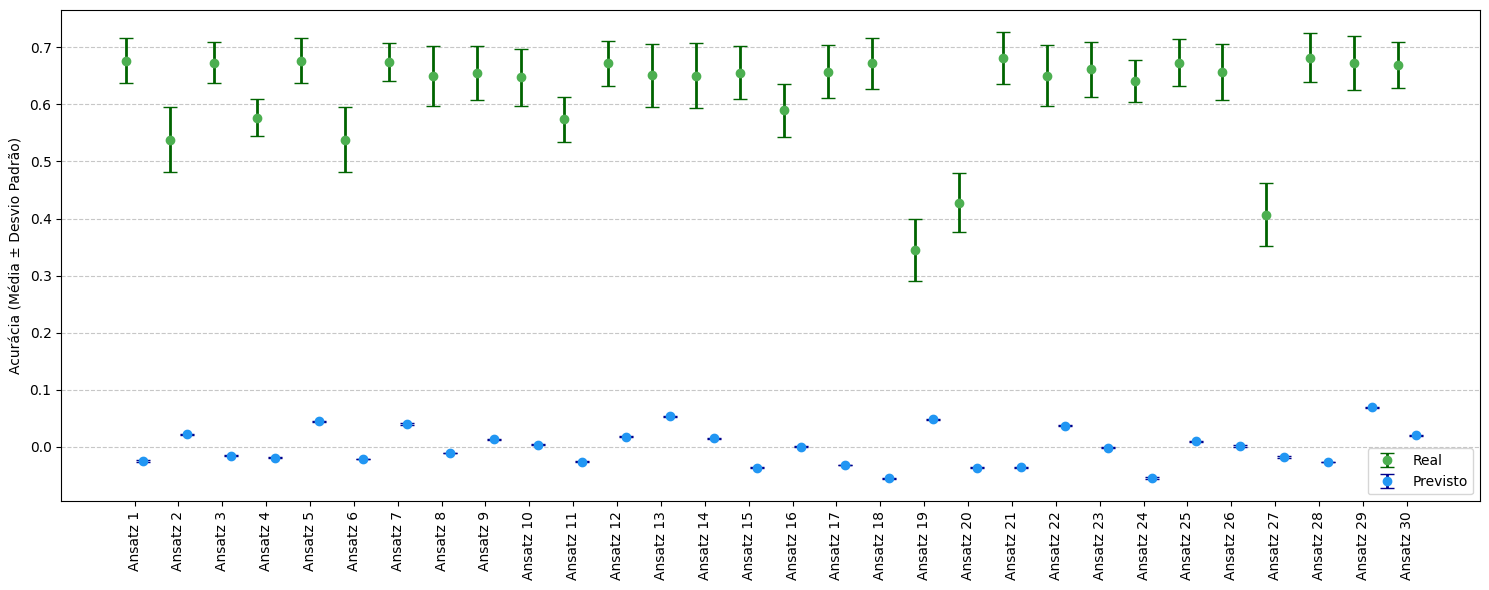

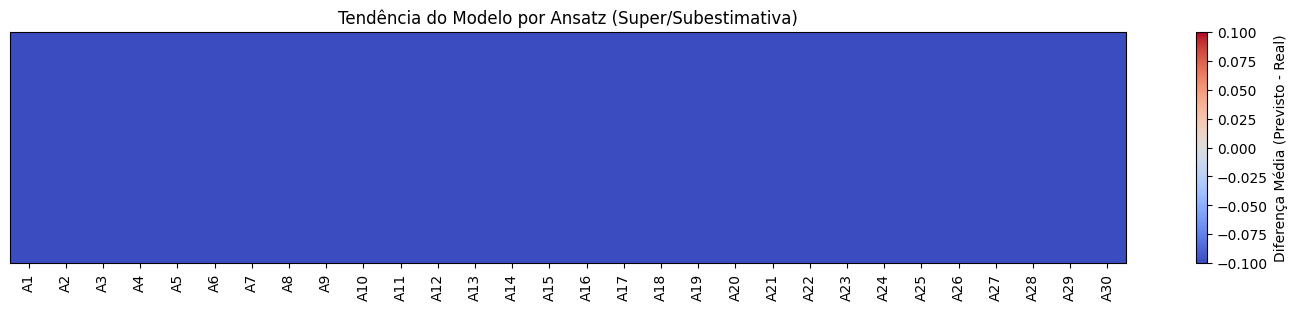

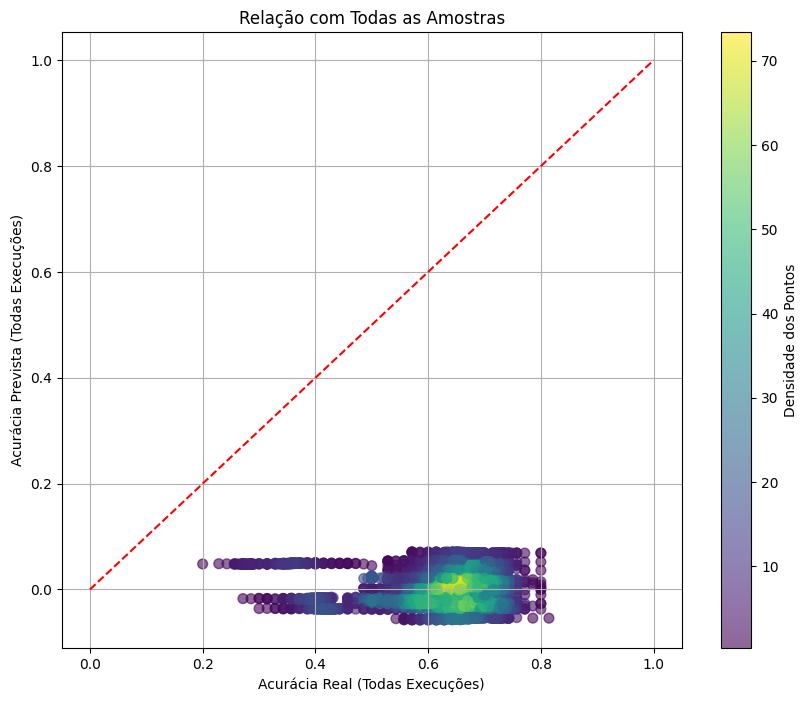

In [42]:
plot_regressor(y, mlp_500_500_500_rgs_resultados, '')